# Projeto Data Science com Python: dados de uma empresa de prestação de serviços
----
Olá, sou Lucas Lopes, sou estudante de Engenharia Química e também de Data Science. Particularmente, possuo muito interesse em análise de dados, em descobrir as informações que os dados podem me entregar e também, em técnicas de modelo de Machine Learning.

Os dados utilizados neste projeto foram fornecidos no curso da Hashtag Treinamentos, Python Impressionador, com intuito de realizar um mini-projeto visando principalmente a manipulação de dados utilizando a biblioteca Pandas. No entanto, deicidi aprofundar melhor as análises fazendo uso e estudo de outras ferramentas.

A base de dados são do ano de 2019 de uma empresa de prestação de serviços e possuem 3 Data Frames:
 - Cadastro de Funcionários
   - Possui informações dos funcionários, identificação, estado civil e custos.
 - Cadastro de Clientes
   - Possui identificação dos clientes e a mensalidade de cada contrato.
 - Serviços Prestados
   - Dados de cada serviço, cliente que recebeu, funcionário que fechou o contrato e tempo de contrato.

#### Objetivo geral
Neste meu primeiro projeto, possuo como objetivo principal aperfeiçoar minhas minhas hard skills e soft skills requisitadas em Data Science utilizando os dados de uma empresa de prestação de serviços.

#### Objetivos específico
 - Realizar uma análise exploratória nos dados em busca de informações e indicadores de eficiência da empresa;
 - Aperfeiçoar técnicas de manipulação de dados;
 - Utilizar ferramentas estatísticas e gráficas para interpretar os dados e indicadores;
 - Estudar a aplicação de modelos de Machine Learning, balanceamento de dados, avaliação e validação de modelos;
 - Aperfeiçoar a capacidade analítica e exploratória para interpretar os dados;
 ----
 Para iniciar a análise, primeiramente será feita a leitura das base de dados que estão no drive. Para isso, será criado o link de download dos dados e será lido através da biblioteca Pandas.

In [1]:
# links de download para leitura dos dados
url_servicos= r'https://docs.google.com/uc?export=download&id=1IjbsyLVbrc6whPCJUTRGOO_9L97n5GMF'
url_clientes= r'https://docs.google.com/uc?export=download&id=1zphrUnnVB1ZLRooiFRF70uQK8XCAJhm-'
url_funcionarios= r'https://docs.google.com/uc?export=download&id=18y-7URnShuLLqMK4LbbJ-ja1LGMoMSXU'

In [2]:
# importando bibliotecas
import pandas as pd

Após a leitura de cada bases de dados, se usará a função info para obter informações como tipos de colunas, quantidade de linhas, quantidade de colunas e dados núlos de cada uma das bases de dados. Após isso, será feita a tomada de decisão a respeito da necessidade do tratamento dos dados.

In [3]:
# leitura base de dados em excel dos serviços prestados
df_servicos = pd.read_excel('BaseServiçosPrestados.xlsx')

# retirada das colunas Unnamed com a função drop
df_servicos.drop(['Unnamed: 4','Unnamed: 5'], axis=1, inplace=True)
df_servicos.rename(columns={'Tempo Total de Contrato (Meses)':'Tempo Contrato (M)'}, inplace=True)

print('BASE DE DADOS SERVIÇOS')
df_servicos.head()

BASE DE DADOS SERVIÇOS


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Contrato (M)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


In [4]:
print('BASE DE DADOS SERVIÇOS\n','='*50)

# função info para visualizar as informações do data frame dos serviços
df_servicos.info()

BASE DE DADOS SERVIÇOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Codigo do Servico   237 non-null    object
 1   ID Funcionário      237 non-null    int64 
 2   ID Cliente          237 non-null    int64 
 3   Tempo Contrato (M)  237 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ KB


In [5]:
# leitura base de dados em csv do cadastro dos clientes
df_clientes = pd.read_csv('CadastroClientes.csv', sep = ';')

# de antemão já retirarei o nome dos cleintes
df_clientes.drop('Cliente', axis=1, inplace=True)

df_clientes.head()

,ID Cliente,Valor Contrato Mensal
0,1,540
1,2,1260
2,3,3195
3,4,2520
4,5,3510


In [6]:
print('BASE DE DADOS CLIENTES\n','='*50)

# função info para visualizar as informações do data frame dos clientes
df_clientes.info()

BASE DE DADOS CLIENTES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   ID Cliente             320 non-null    int64
 1   Valor Contrato Mensal  320 non-null    int64
dtypes: int64(2)
memory usage: 5.1 KB


In [7]:
# leitura base de dados em csv do cadastro dos funcionários
df_funcionarios = pd.read_csv('CadastroFuncionarios.csv', sep =';', decimal = ',')
# também será retirado o nome dos funcionários
df_funcionarios.drop('Nome Completo', axis=1, inplace=True)

print('BASE DE DADOS FUNCIONÁRIOS')
df_funcionarios.head(10)

BASE DE DADOS FUNCIONÁRIOS


,ID Funcionário,Estado Civil,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
5,6,C,23688,11844.0,4737.6,242,594.72,Analista,Operações
6,7,C,17875,8937.5,3575.0,286,813.12,Diretor,Financeiro
7,8,C,3540,1770.0,708.0,198,769.44,Analista,Operações
8,9,S,23512,11756.0,4702.4,242,745.92,Analista,Financeiro
9,10,S,24857,12428.5,4971.4,264,719.04,Coordenador,Administrativo


In [8]:
print('BASE DE DADOS FUNCIONÁRIOS\n','='*50)

# função info para visualizar as informações do data frame dos funcionários
df_funcionarios.info()

BASE DE DADOS FUNCIONÁRIOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Funcionário  114 non-null    int64  
 1   Estado Civil    114 non-null    object 
 2   Salario Base    114 non-null    int64  
 3   Impostos        114 non-null    float64
 4   Beneficios      114 non-null    float64
 5   VT              114 non-null    int64  
 6   VR              114 non-null    float64
 7   Cargo           114 non-null    object 
 8   Area            114 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 8.1+ KB


Não há dados nulos e os dados estão sendo reconhecidos de acordo com seu tipo (objeto, inteiro ou float), por isso não há necessidade de tratamento.

Na base de dados dos serviços há a coluna "Codigo do Serviço" que não influenciará nas análises posteriores, por isso será retirada.

In [9]:
# drop da coluna código do serviço
df_servicos.drop('Codigo do Servico', axis=1, inplace=True)

## Faturamento da empresa
Com o tempo de contrato e o valor do contrato mensal nas bases de dados dos serviços e clientes, consegue-se obter o faturamento total da empresa.

Para calcular o faturamento total é preciso realizar a multiplicação o "Tempo de contrato de cada serviço" com o "Valor de contrato", ambos estão na mesma unidade temporal de "meses". No entanto, estão em duas base de dados separadas e desordenadas para fazer uma multiplicação direta.

Como solução, irei mesclar os dois data frame com a função do pandas .merge() de acordo com a coluna semelhante entre ambas as bases "ID Cliente" com o parâmetro "on".

In [10]:
# mescla e visualização dos data frames
df_SC = df_servicos.merge(df_clientes, on = 'ID Cliente')
df_SC.head()

,ID Funcionário,ID Cliente,Tempo Contrato (M),Valor Contrato Mensal
0,67,1,14,540
1,17,2,12,1260
2,116,4,14,2520
3,37,5,8,3510
4,130,6,8,2340


In [11]:
# nova coluna do faturamento por contrato
df_SC['Faturamento Contrato'] = df_SC['Tempo Contrato (M)'] * df_SC['Valor Contrato Mensal']
df_SC.head()

,ID Funcionário,ID Cliente,Tempo Contrato (M),Valor Contrato Mensal,Faturamento Contrato
0,67,1,14,540,7560
1,17,2,12,1260,15120
2,116,4,14,2520,35280
3,37,5,8,3510,28080
4,130,6,8,2340,18720


In [12]:
# soma da nova coluna par aobter o faturamento total
faturamento_total = df_SC['Faturamento Contrato'].sum()
print(f'O faturamento total da empresa foi de R$ {faturamento_total:,.2f}')

O faturamento total da empresa foi de R$ 5,519,160.00


## Custo total da Folha Salarial dos funcionários
Saber o custo total para a empresa com a folha salarial dos funcionários pode ser interessante para calcular o lucro com base nos custos conhecidos.

O objetivo aqui é saber não só o custo da folha salárial de todos funcionários, mas também o percentual consumido do faturamento (lucro bruto) que é gasto com eles.

A base de dados dos funcionários possui todas informações para calcular o valor total da folha, basta somar Salário + Impostos + Beneficios + Vale Trasnporte + Vale Refeição para isso em uma nova coluna e somar.

In [13]:
# coluna da folha salarial de cada funcionário
df_funcionarios['Folha Salarial'] = df_funcionarios['Salario Base'] + df_funcionarios['Impostos'] \
                                    + df_funcionarios['Beneficios'] + df_funcionarios['VT'] + df_funcionarios['VR']

# soma utilizando função .sum() 
gastos_folha_salarial_sum = df_funcionarios['Folha Salarial'].sum()

print(f'Os gastos totais com funcionário da empresa foi de R$ {gastos_folha_salarial_sum:,.2f}')

Os gastos totais com funcionário da empresa foi de R$ 2,717,493.22


In [14]:
# calculo do percentual consumido pelos custos com funcionário em cima do faturamento
pct_consumido_funcionario = gastos_folha_salarial_sum / faturamento_total

print(f'As despesas com funcionário consomem um total de {pct_consumido_funcionario:.2%} do faturamento.')

As despesas com funcionário consomem um total de 49.24% do faturamento.


## Lucro líquido da empresa
Com as últimas duas informações calculadas, fica fácil calcular o lucro da empresa em cima dos custos ofertados pelas bases de dados, visto que provavelmente a empresa terá outros custos fixos e variáveis para manter-se.

O lucro líquido será a subtração entre o faturamento total dos contratos e a soma dos gastos com a folha salárial para cada funcionários.

In [15]:
# cálculo do lucro líquido
lucro_liquido = faturamento_total - gastos_folha_salarial_sum

print(f'O lucro líquido da empresa foi de R$ {lucro_liquido:,.2f}')

O lucro líquido da empresa foi de R$ 2,801,666.78


## Ticket médio mensal
O ticket médio é um indicador de desempenho crucial que fornece o valor médio de vendas por cliente. Neste caso, se tem o valor dos contratos que foram fechados e também o valor para cada cliente, mas que não necessariamente está com um contrato ativo. Por isso, pode-se calcular o ticket médio real e o potencial.

In [108]:
# cálculo do ticket mensal real
ticket_mean_real = df_SC['Valor Contrato Mensal'].mean()

print(f' O ticket médio mensal foi de R${ticket_mean_real:,.2f}.')

 O ticket médio mensal foi de R$2,438.35.


In [109]:
# cálculo do ticket mensal potencial
ticket_mean_pot = df_clientes['Valor Contrato Mensal'].mean()

print(f' O potencial do ticket médio mensal é de R${ticket_mean_pot:,.2f}.')

 O potencial do ticket médio mensal é de R$2,502.56.


In [111]:
# cálculo do gap entre o ticket médio real e potencial
ticket_gap = (ticket_mean_real / ticket_mean_pot) - 1 

print(f'O gap entre o ticket realizado e o potencial a ser realizado é de {ticket_gap:.2%}.')

O gap entre o ticket realizado e o potencial a ser realizado é de -2.57%.


Como pode-se observar, a empresa está perdendo -2,57% de ticket médio mensal em relação aos serviços potenciais que poderiam ser oferecidos para os clientes que não possuem contrato ativo.

## Eficiência dos funcionários em fechar pelo menos um contrato
É importante saber um percentual de funcionários que consegue fechar pelo menos um contrato para usar como indicador de eficiência da equipe como um todo.

Uma análise mais estatística do conjunto de funcionários para usar como indicador seria interessante, até para ver se a maioria das vendas está vindo de apenas um grupo menor de funcionários ou está bem distribuídas entre eles.

Para calcular o percentual de funcionários que já fecharam contrato será feito o cálculo do funcionarios_contrato / total_funcionarios, o total de funconários pode ser calculado através do data frame de funcionários, já os que fecharam pelo menos um contrato, podem ser obtidos através do data frame de serviços, certificando-se que repita apenas uma vez cada funcionários, pois um único funcionário pode fechar diversos contratos.

Para evitar repetições nos ID de cada funcioário, será utilizada a função unique() e para saber a quantidade, a função len().

In [16]:
# cálculo do total de funcionários com a função unique para evitar repetições
total_funcionarios_len = len(df_funcionarios['ID Funcionário'].unique())

total_funcionarios_len

114

In [17]:
# base de ID Funcionarios com função unique para evitar repetições, para verificar a filtragem, realizei um "teste"
funcionarios_contrato_teste_len = len(df_servicos['ID Funcionário'])
funcionarios_contrato_len = len(df_servicos['ID Funcionário'].unique())

print('Funcionários que fecharam contrato sem repetição:',funcionarios_contrato_len, '\nFuncionários que fecharam contrato com repetição:', funcionarios_contrato_teste_len)

Funcionários que fecharam contrato sem repetição: 99 
Funcionários que fecharam contrato com repetição: 237


In [18]:
# cálculo do percentual de funcionários que fecharam pelo menos um contrato
pct_funcionarios_contrato = funcionarios_contrato_len / total_funcionarios_len

print(f'O percentual de funcionários que fecharam pelo menos um contrato foi de {pct_funcionarios_contrato:.2%},\njá o percentual de funcionários que não fecharam contrato foi de {(1 - pct_funcionarios_contrato):.2%}.')

O percentual de funcionários que fecharam pelo menos um contrato foi de 86.84%,
já o percentual de funcionários que não fecharam contrato foi de 13.16%.


## Eficiência do setor/área da empresa por funcionário em fechar contrato

O percentual de funcionários que fecharam contrato foi de 86,84, é um percentual bem alto, o que significa que a maioria dos funcionários é eficiente em fechar pelo menos um contrato de serviço.

Está bem, mas por que existe 13,16% de funcionários que não fecharam contrato? Se criar uma base de dados filtrando apenas os funcionários que não fecharam contrato, talvez possa explorar melhor esse grupo de funcionários e partir para novos questionamentos.

In [19]:
# criando lista de funcionários que fecharam contrato a partir da base de dados de serviços
lista_ID_venderam = list(df_servicos['ID Funcionário'].unique())

print(lista_ID_venderam[:5])

[67, 17, 116, 37, 130]


In [20]:
# lista para armazenar o ID de cada funcionário que não vendeu
lista_ID_n_venderam = []

# for comparando cada funcionário da lista de funcionários com a lista de funcionários que já fecharam contrato
for ID_total in df_funcionarios['ID Funcionário']:
    # se o ID do funcionário estiver na lista de ID de funcionário que fechou contrato, passe
    if ID_total in lista_ID_venderam:
        pass
    # caso não esteja, funcionário será adicionado a lista dos que não venderam
    else:
        lista_ID_n_venderam.append(ID_total)
        
# Data drame de funcionários que não fecaram contrato. Ele foi criado apartir da lista de funcionários que não fecharam,
# foi mesclado com as informações de todos os funcionários filtrando pelo ID Funcionário, ficando só os que não fecharam.
# NFC = não fecharam contrato
df_funcionarios_NFC = pd.DataFrame({'ID Funcionário':lista_ID_n_venderam}).merge(df_funcionarios, on = 'ID Funcionário')
df_funcionarios_NFC.head(len(df_funcionarios_NFC))

,ID Funcionário,Estado Civil,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Folha Salarial
0,2,C,5404,2702.0,1080.8,154,574.56,Estagiário,Logística,9915.36
1,6,C,23688,11844.0,4737.6,242,594.72,Analista,Operações,41106.32
2,21,C,19045,9522.5,3809.0,264,836.64,Diretor,Financeiro,33477.14
3,56,S,19297,9648.5,3859.4,154,557.76,Estagiário,Comercial,33516.66
4,61,C,13008,6504.0,2601.6,308,517.44,Estagiário,Logística,22939.04
5,63,S,11983,5991.5,2396.6,264,826.56,Analista,Administrativo,21461.66
6,78,S,19086,9543.0,3817.2,264,514.08,Analista,Comercial,33224.28
7,81,C,12377,6188.5,2475.4,308,766.08,Coordenador,Logística,22114.98
8,91,S,2247,1123.5,449.4,264,829.92,Coordenador,Comercial,4913.82
9,98,C,5026,2513.0,1005.2,242,520.80,Gerente,Comercial,9307.00


OK, com esse data frame se tem todos os detalhes de cada funcionário que não fechou nenhum contrato. Isso é bom, mas a pergunta é: Por quê?

Com uma análise visual na área de atuação, consegue-se perceber uma boa variedade dessas áreas, o que não ajuda muito, por isso, um histograma pode facilitar essa visualização. Para isso, irei utilizar um gráfico de barras que é uma forma ótima e rápida de fazer essa análise.

Primeiramente, vou começar buscando um histograma que mostre o total de funcionários em cada área para analisar a distribuição dos mesmos.

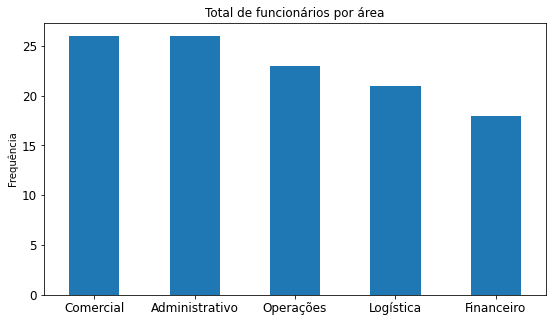

In [21]:
# utiliza-se a função value_counts() para contar a frequência dos objetos da coluna 'Area'
# para visualização do gráfico de barras, usa-se a função plot com o kind em 'bar' e mais parâmetros de formatação
df_funcionarios['Area'].value_counts().plot(kind='bar', figsize = (9,5), rot = 0, fontsize = 12, \
                                               ylabel = 'Frequência', title = 'Total de funcionários por área');

O setor administrativo e comercial são equivalente e apresentam maior número de funcionários. Portanto, uma análise comparativa na eficiência dos dois setores seria interessante.

Conhecendo os setores marjoritários em funcionários, agora será utilizado a base de dados criada para os funcionários que não fecharam contrato para explorar melhor cada área e buscar sua eficiência nos contratos.

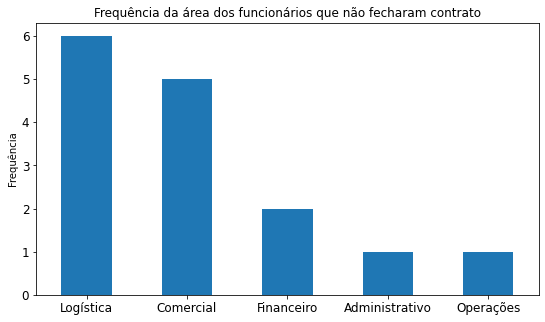

In [22]:
# gráfico de barras dos funcionários que não tiveram sucesso no fechamendo de nenhum contrato
df_funcionarios_NFC['Area'].value_counts().plot(kind='bar', figsize = (9,5), rot = 0, fontsize = 12, \
                                               ylabel = 'Frequência', title = 'Frequência da área dos funcionários que não fecharam contrato');

Certo, com essa visualização através do gráfico de barra consegue-se ver claramente as áreas marjoritárias dos funcionários que não tiveram sucesso em nenhum fechamento de contrato.

Consegue-se ver claramente uma boa superioridade na frequência das áreas de Logística e Comercial, em terceiro o setor Financeiro, mas com menos frequência. E isso, gera outros "porquês":
 - #### O setor de logística também é responsável por fechar contratos? Quanto a outros setores como Financeiro, Operações e Administrativo? Faz sentido classificar os funcionários desses setores como que não fecharam contrato?
   - Para esclarecer melhor essas dúvidas, será feito um gráfico de barras com o mesmo intuito do mostrado acima, mas apenas com os que fecharam contrato.
   - Caso haja funcionarios de outros setores, presume-se que todos os funcionários da empresa fecham contrato de serviço e participam ativamente desse processo, senão classificar os funcionários desses setores como "não venderam" não terá sentido.
 - #### A segunda classe marjoritária é Comercial, que provavelmente é a principal responsável pelo fechamento dos contratos em meu ponto de vista, já que têm-se apenas os dados e não uma descrição profunda da estrutura empresarial. Daí vem a pergunta, por ser a segunda classe marjoritária dos funcionários que não fecharam contrato, significa baixo desempenho dos mesmos?
   - Talvez sim, visto que são os protagonistas no fechamento de contrato. No entanto, analisar os cargos dos mesmos também pode esclarecer melhor o por que de não venderem.

In [23]:
# criando data frame a partir da lista de funcionários que fecharam contrato e mesclando com o data frame de funcionários
# FC = fecharam contrato
df_funcionarios_FC = pd.DataFrame({'ID Funcionário':lista_ID_venderam}).merge(df_funcionarios, on = 'ID Funcionário')

df_funcionarios_FC.backfill()

,ID Funcionário,Estado Civil,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Folha Salarial
0,67,C,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,21629.72
1,17,S,15718,7859.0,3143.6,176,628.32,Coordenador,Logística,27524.92
2,116,C,21154,10577.0,4230.8,198,792.96,Analista,Logística,36952.76
3,37,C,3398,1699.0,679.6,242,540.96,Analista,Financeiro,6559.56
4,130,S,5818,2909.0,1163.6,242,598.08,Coordenador,Comercial,10730.68
...,...,...,...,...,...,...,...,...,...,...
94,25,S,23612,11806.0,4722.4,264,561.12,Diretor,Administrativo,40965.52
95,79,S,17207,8603.5,3441.4,198,688.80,Diretor,Operações,30138.70
96,99,C,18763,9381.5,3752.6,154,692.16,Coordenador,Administrativo,32743.26
97,14,C,2182,1091.0,436.4,220,604.80,Estagiário,Financeiro,4534.20


Acredtido que as resposta para as perguntas se os funcionários de outros setores além do comercial participam das vendas e fechamento de contrato foi respondida apenas com uma breve observação no data frame acima. Partindo desse pressuposto, pode-se tratar todos funcionários como iguais na hora de fechar contrato. Apesar disso, será feito um gráfico de barras para ver qual área que mais possui funcionários que fecharam contrato e será comparado aos dos que não fecharam contrato. Para isso, será importada a biblioteca matplotlib, mais especificadamente com a interface pyploy, que irá possibilitar a visualização dos dois gráficos juntos.

In [24]:
# importando matplotlib pyplot
import matplotlib.pyplot as plt

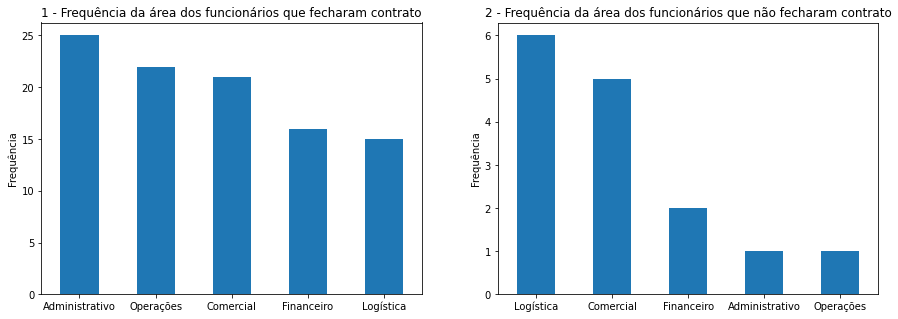

In [25]:
# formatação do tamanho da figura
plt.figure(figsize=(15,5));

# plot da primeira figura, FUNCIONÁRIOS QUE FECHARAM CONTRATO, utilizando o data frame criado a cima
plt.subplot(1, 2, 1)
df_funcionarios_FC['Area'].value_counts().plot(kind='bar', rot = 0);
plt.title('1 - Frequência da área dos funcionários que fecharam contrato')
plt.ylabel('Frequência')

# plot segunda gráfico de barras, FUNCIONÁRIOS QUE NÃO FECHARAM CONTRATO, igual o plotado anteriormente
plt.subplot(1, 2, 2)
df_funcionarios_NFC['Area'].value_counts().plot(kind='bar', rot = 0);
plt.title('2 - Frequência da área dos funcionários que não fecharam contrato')
plt.ylabel('Frequência')

plt.show()

A primeira coisa que nota-se claramente é a quase inversão da ordem das áreas de um gráfico para o outro, com excessão do setor comercial, que apesar de ter o segundo maior número de funcionários que não fecharam contrato, é o terceiro que mais fechou contrato. Com base nisso, já se pode ter uma noção dos setores com funcionários mais eficientes no quesito de vendas, lembrando que essa é uma análise exclusivamente unitária, independendo se X funcionário de X setor possui mais de uma venda, isso será realizado em outra análise.
 - #### Apesar da boa visualização que os gráficos proporcionam, por os dados em números é importante para mensurar a análise. Por isso, seguir será calculada a eficiencia individual de cada setor nas vendas.

In [26]:
    # funcionários do setor administrativo que já fecharam contrato \
    # utilizei a base de dados já existente aplicando uma condição para filtrar apenas o setor Administrativo
fun_adm_FC = len(df_funcionarios_FC[df_funcionarios_FC['Area']=='Administrativo']['Area'])
    # total de funcionários do setor administrativo
fun_adm_total = len(df_funcionarios[df_funcionarios['Area']=='Administrativo']['Area'])
    # cálculo da eficiência
ef_adm = fun_adm_FC / fun_adm_total

In [27]:
    # funcionários do setor de operações que já fecharam contrato
fun_op_FC = len(df_funcionarios_FC[df_funcionarios_FC['Area']=='Operações']['Area'])
    # total de funcionários do setor de operações
fun_op_total = len(df_funcionarios[df_funcionarios['Area']=='Operações']['Area'])
    # cálculo da eficiência
ef_op = fun_op_FC / fun_op_total

In [28]:
    # funcionários do setor comercial que já fecharam contrato
fun_com_FC = len(df_funcionarios_FC[df_funcionarios_FC['Area']=='Comercial']['Area'])
    # total de funcionários do setor comercial
fun_com_total = len(df_funcionarios[df_funcionarios['Area']=='Comercial']['Area'])
    # cálculo da eficiência
ef_com = fun_com_FC / fun_com_total

In [29]:
    # funcionários do setor financeiro que já fecharam contrato
fun_fin_FC = len(df_funcionarios_FC[df_funcionarios_FC['Area']=='Financeiro']['Area'])
    # total de funcionários do setor financeiro
fun_fin_total = len(df_funcionarios[df_funcionarios['Area']=='Financeiro']['Area'])
    # cálculo da eficiência
ef_fin = fun_fin_FC / fun_fin_total

In [30]:
    # funcionários do setor financeiro que já fecharam contrato
fun_log_FC = len(df_funcionarios_FC[df_funcionarios_FC['Area']=='Logística']['Area'])
    # total de funcionários do setor financeiro
fun_log_total = len(df_funcionarios[df_funcionarios['Area']=='Logística']['Area'])
    # cálculo da eficiência
ef_log = fun_log_FC / fun_log_total

In [31]:
print(f'EFICIÊNCIA DO SETOR NAS VENDAS POR FUNCIONÁRIO QUE CONSEGUE FECHAR UM CONTRATO:\n\n\
Eficiência Administrativo: {ef_adm:.2%}\nEficiência Operações: {ef_op:.2%}\n\
Eficiência Financeiro: {ef_fin:.2%}\nEficiência Comercial: {ef_com:.2%}\nEficiência Logística: {ef_log:.2%}')

EFICIÊNCIA DO SETOR NAS VENDAS POR FUNCIONÁRIO QUE CONSEGUE FECHAR UM CONTRATO:

Eficiência Administrativo: 96.15%
Eficiência Operações: 95.65%
Eficiência Financeiro: 88.89%
Eficiência Comercial: 80.77%
Eficiência Logística: 71.43%


- Como esperado, o setor administrativo foi o que apresentou maior eficiência no quesito de funcionários que conseguem fechar pelo menos um contrato e em seguida, o setor de operações.


- Apesar do setor de comercial estar em terceiro com mais funcionários que venderam e o setor financeiro de quarto, a sua eficiência é consideravelmente mais baixa que a do financeiro pois também é o segundo setor que mais apresenta funcionários que não fecharam contrato.


- O setor de logística é o que mais apresenta funcionários que não fecharam contrato e o com mais baixa eficiência.


- O setor de comercial e administrativo apresentam uma boa diferença entre sua eficência e como visto anteriormente, eles são equivalentes em número de funcionários e marjoritários númericamente perante as outras áreas, o que enfatiza ainda mais a eficiência e déficit da mesma das respectivas áreas.


- Por último, a eficiência se apresentou na ordem inversa do gráfico de barras dos funcionários que não fecharam contrato. Portanto, não basta ter um time com grande volume de funcionários se parte deles não consegue efetuar uma venda.

Mas qual será a ordem de setores que mais fecharam contrato? Será que essa ordem obedecerá a eficiência de cada setor? Ou talvez em algum setor com eficiência mais baixa há funcionários que fecham muito contrato aumentando muito o número de contratos do setor e ultrapassando outros com eficiência mais alta?
 - Para descobrir essas respostas será necessário o criar um dataframe que vincule os serviços com os funcionários mas sem filtro algum. Dessa forma, irá se aproveitar o data frame "df_SC" - que foi criada para calcular o faturamento e possui o faturamento da empresa por contrato - que será mesclado com o data frame dos funcionários. Assim, criando uma base de dados que mescla as 3 bases juntas e possui informações já calculadas também como a folha salarial de cada funcionário.

In [32]:
# criação do data frame de serviços mesclado com o de funcionários e visualização do mesmo
# SFC = serviços, funcionários, clientes (nome das 3 bases de dados originais)
df_SFC = df_SC.merge(df_funcionarios, on = 'ID Funcionário')
df_SFC.head(3)

,ID Funcionário,ID Cliente,Tempo Contrato (M),Valor Contrato Mensal,Faturamento Contrato,Estado Civil,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Folha Salarial
0,67,1,14,540,7560,C,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,21629.72
1,67,78,6,1710,10260,C,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,21629.72
2,67,125,8,1710,13680,C,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,21629.72


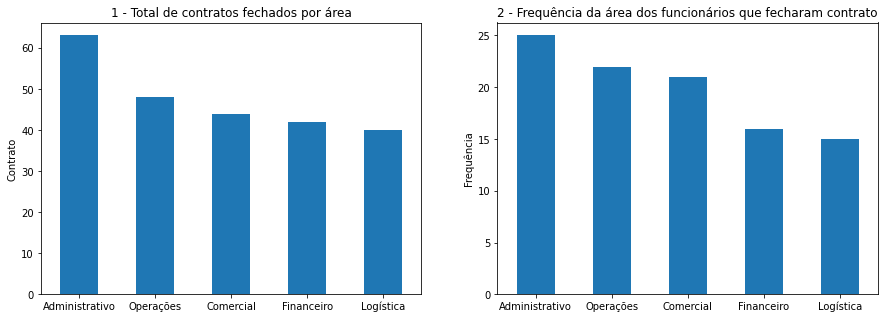

In [33]:
# plotagem do gráfico de barras do TOTAL DE CONTRATOS FECHADOS POR ÁREA
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
df_SFC['Area'].value_counts().plot(kind='bar', rot = 0);
plt.title('1 - Total de contratos fechados por área')
plt.ylabel('Contrato')

# plot da primeira figura, FUNCIONÁRIOS QUE FECHARAM CONTRATO, utilizando o data frame criado a cima
plt.subplot(1, 2, 2)
df_funcionarios_FC['Area'].value_counts().plot(kind='bar', rot = 0);
plt.title('2 - Frequência da área dos funcionários que fecharam contrato')
plt.ylabel('Frequência')

plt.show()

Na figura 1, têm-se o total de contratos fechados por área, o setor administrativo novamente se mostrou o setor mais eficiente. Seguidamente dos setores de operações, comercial, financeiro e logística. Sequência essa já vista anteriormente no gráfico da quantidade de funcionários de cada área que conseguiu fechar pelo menos um contrato, mostrado na figura 2.

Para entender melhor a distruibuição dos fechamentos de contratos, será necessário obter a média, desvios, valor dos quartis, mínimos e máximos do número de contratos fechados por funcionários divido por área e também no total.

Será obtido isso através de um método mais visual, utilizando o gráfico boxplot da bilbioteca seaborn e a função describe do pandas que retorna esses dados em números.

In [34]:
# importanto a biblioteca seaborn
import seaborn as sns

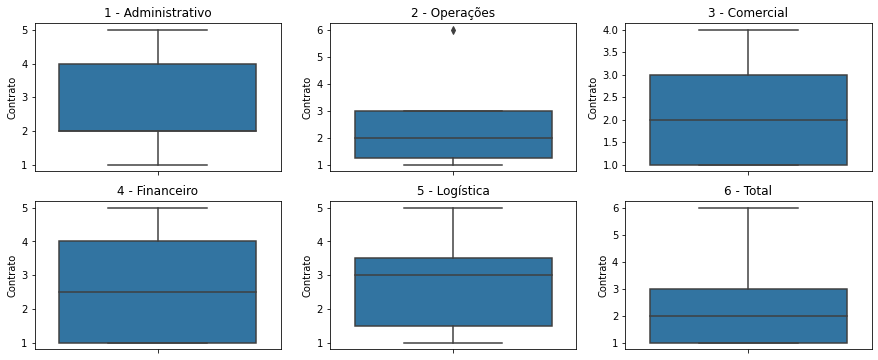

In [35]:
# para cada plotagem, foi condicionado o data frame ao seu respectivo setor e utilizada a função value_counts para 
# fazer a contagem de vendas de cada funcionário
plt.figure(figsize=(15,6))

# plot administrativo
plt.subplot(2, 3, 1)
sns.boxplot(y=df_SFC[df_SFC['Area']=='Administrativo']['ID Funcionário'].value_counts())
plt.title('1 - Administrativo')
plt.ylabel('Contrato') 

# plot operações
plt.subplot(2, 3, 2)
sns.boxplot(y=df_SFC[df_SFC['Area']=='Operações']['ID Funcionário'].value_counts())
plt.title('2 - Operações')
plt.ylabel('Contrato') 

#plot comercial
plt.subplot(2, 3, 3)
sns.boxplot(y=df_SFC[df_SFC['Area']=='Comercial']['ID Funcionário'].value_counts())
plt.title('3 - Comercial')
plt.ylabel('Contrato') 

#plot financeiro
plt.subplot(2, 3, 4)
sns.boxplot(y=df_SFC[df_SFC['Area']=='Financeiro']['ID Funcionário'].value_counts())
plt.title('4 - Financeiro')
plt.ylabel('Contrato') 

# plot logística
plt.subplot(2, 3, 5)
sns.boxplot(y=df_SFC[df_SFC['Area']=='Logística']['ID Funcionário'].value_counts())
plt.title('5 - Logística')
plt.ylabel('Contrato') 

# plot total
plt.subplot(2, 3, 6)
sns.boxplot(y=df_SFC['ID Funcionário'].value_counts())
plt.title('6 - Total')
plt.ylabel('Contrato') 
plt.show()

In [36]:
# lista para rotular cada describe na ordem das áreas que mais fecharam contrato
lista_areas = ['Administrativo', 'Operações', 'Comercial', 'Financeiro', 'Logística']
# for para fazer o describe das áreas
for area in lista_areas:
    print(f'Área {area}')
    display(df_SFC[df_SFC['Area']==area]['ID Funcionário'].value_counts().describe())
# describre do total
print(f'Total')
display(df_SFC['ID Funcionário'].value_counts().describe())

Área Administrativo


count    25.000000
mean      2.520000
std       1.228821
min       1.000000
25%       2.000000
50%       2.000000
75%       4.000000
max       5.000000
Name: ID Funcionário, dtype: float64

Área Operações


count    22.000000
mean      2.181818
std       1.139606
min       1.000000
25%       1.250000
50%       2.000000
75%       3.000000
max       6.000000
Name: ID Funcionário, dtype: float64

Área Comercial


count    21.000000
mean      2.095238
std       0.995227
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: ID Funcionário, dtype: float64

Área Financeiro


count    16.000000
mean      2.625000
std       1.408309
min       1.000000
25%       1.000000
50%       2.500000
75%       4.000000
max       5.000000
Name: ID Funcionário, dtype: float64

Área Logística


count    15.000000
mean      2.666667
std       1.290994
min       1.000000
25%       1.500000
50%       3.000000
75%       3.500000
max       5.000000
Name: ID Funcionário, dtype: float64

Total


count    99.000000
mean      2.393939
std       1.202193
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: ID Funcionário, dtype: float64

A partir dessa análise gráfica e numérica, fica muito claro o motivo do setor administrativo manter superioride nos fechamento de contratos:
   - Primeiramente a superioridade numérica de funcionários (somente comercial é equivalente) e por ter 96,15% dos funcionários fechando contrato.
   - Primeiro Quartil de contratos por funcionário de 2, isso significa que 25% fecharam até 2 contratos no máximo. Ok!? Mas isso é bom? Com certeza, comparando com o valor do primeiro quartil do "Total", que é 1, o setor administrativo já mostra superioridade, mostrando que boa parte dos 25% dos funcionários que menos fecharam contrato fecharam até 2 contratos.
   - O Segundo Quartil, ou mediana, é de 2 e média de 2,52, mostrando que a maior parte dos funcionários fechou por volta de 2 contratos. No entanto, esse valor está coerente com a média e mediana do "Total" também, que é média de 2,39 e mediana de 2.
   - Se mostra superior no Terceiro Quartil também, os 75% da população fecharam até 4 contratos, o que é bom e superior a média "Total", que foi de 3 no Terceiro Quartil.
----
Uma coisa que me surpreendeu muito foi o setor de logística, que é o com pior eficiência nos funcinários em relação ao fechamento de contrato, que é de 71,43%, possuir parâmetros estatísticos de fechamento de contrato por funcionário quase tão bons quanto do setor administrativo.
   - Primeiro quartil de 1,5, nada muito superior a média do "Total" no Primeiro Quartil, mas já é superior.
   - Possui a melhor mediana de todas áreas, no valor de 3 contratos por funcionário, o que mostra um balanceamento nos fechamentos da população central muito bom.
   - Maior média das áreas, no valor de 2,67 contratos por funcionário.
   - Terceiro Quartil inferior ao administrativo, mas num valor superior do da média "Total".
Com essas métricas avaliativas, com certeza o setor de logística possui um grande potencial de fechamento de contratos, basta melhorar na quesito eficiência de todos os funcionários.
----
O setor de operações é o segundo que mais fechou contrato e suas principais características são:
   - A população de número de contratos fechados por funcionários está bem concentrada e com uma pequena amplitude nos valores, que estão entre valores de 1,25 (Primeiro Quartil) e 3 (Terceiro Quartil).
   - Sua mediana é de 2 e média de 2,18.
Analisando sua eficiência, que é de 95.65%, a segunda mais alta, contabilizando que é a terceira maior população de funcionários da empresa e seus centros de dados está em 2, fica claro também por que está em segundo lugar como que mais fecharam contratos.
----
O setor comercial e financeiro foram respectivamente o terceiro e quarto que mais fecharam contrato e serão analisados juntos pois possuem bastante similaridades na distribuição dos dados.
   - Os dois setores possuem uma alta amplitude nos dados.
   - Os centros dos dados são similares, mas o financeiro é 2,5 e o comercial é de 2.
   - O Terceiro Quartil do financeiro é de 4 e o valor máximo de fechamento de contrato é 5, enquanto do comercial é de 3 e 4, respectivamente.
   - Financeiro possui eficiência de 88,89% e comercial de 80,77%
Para mim, também fica claro o motivo do comercial fechar um pouco mais de contratos que o financeiro, pois o comercial possui superioridade numérica de funcionários, equivalente ao setor administrativo e o financeiro é o último em número de funcionários. Além disso, a eficiência do comercial é de 88,
-------
Nesta etapa, já se conseguiu obter uma boa compreensão dos dados e foi extraída diversas informações deles, como faturamento, despesas com folha salarial, lucro, eficiência de cada área da empresa em relação a se o funcionário consegue ou não fechar contrato, distribuição de funcionários por área, áreas que mais fecharam contrato e no final, se consegui obter uma conclusão e extrair alguns indicadores que justificassem tais feitos.  

## Faturamento por área 
Ok, já se tem bastante coisa, mas depois de obter essas respostas, surgem perguntas como:

 - Qual o setor que mais faturou? Será que os setores que mais fecharam contrato também foi os que mais faturaram?

A fim de obter essas respostas, será utilizado a base de dados df_SFC que contém as informações necessárias do cálcula da folha salarial e da área de cada funcionário juntas.

In [37]:
#filtrando as informações com apenas as que irá se utilizar
df_SFC_fil = df_SFC[['Area','Faturamento Contrato']]

df_SFC_fil.head()

,Area,Faturamento Contrato
0,Financeiro,7560
1,Financeiro,10260
2,Financeiro,13680
3,Financeiro,5670
4,Logística,15120


Para analisar o faturamento de cada área da empresa será utilizado a função groupby que agrupa os dados de acordo com uma coluna referencial, no caso a área de cada funcionário.

In [38]:
# agrupando os data frame filtrado de acordo com a area e somando os valores da folha salarial de cada grupo
# função sort_values para ordenar de forma decrescente a base de dados
# em seguida, convertendo esses dados em um data frame
df_SFC_fil_sum = pd.DataFrame(df_SFC_fil.groupby('Area').sum().sort_values(by='Faturamento Contrato', ascending=False))

# renomeando coluna
df_SFC_fil_sum.rename(columns={'Faturamento Contrato':'Faturamento por Área'}, inplace=True)
df_SFC_fil_sum

,Faturamento por Área
Area,
Administrativo,1527750
Operações,1142730
Comercial,1077660
Financeiro,899910
Logística,871110


Com essa informação já pode-se obter as respostas desejadas, mas acredito que um gráfico de barras pode ordenar e escalonar melhor o faturamento de cada área permitindo uma melhor visualização.

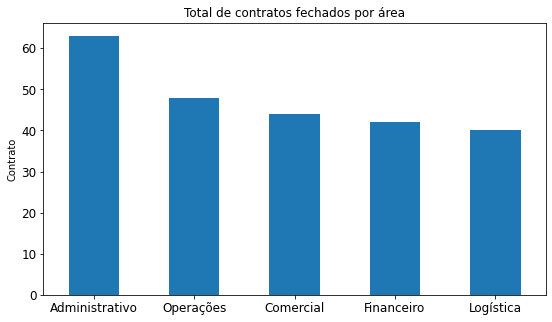

In [39]:
# plot novamento do total de contratos fechados com fins comparativos, não consegui plotar os dois gráficos juntos
df_SFC['Area'].value_counts().plot(kind='bar', rot = 0, xlabel='', ylabel ='Contrato', figsize = (9,5), \
                    title = 'Total de contratos fechados por área', fontsize = 12);

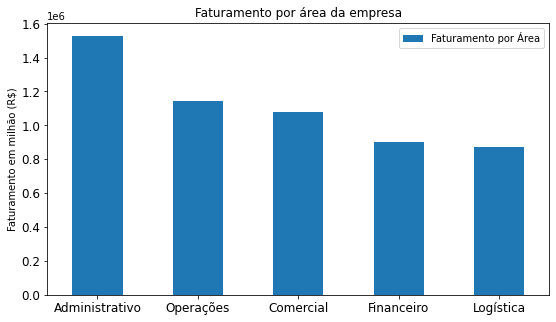

In [40]:
# plotagem do gráfico de barras do faturamento por área da empresa
df_SFC_fil_sum.plot(kind='bar', rot = 0, xlabel='', ylabel ='Faturamento em milhão (R$)', figsize = (9,5), \
                    title = 'Faturamento por área da empresa', fontsize = 12);

A ordem de setor que mais faturou obedeceu a ordem dos setores que mais fechou contrato, talvez isso fosse esperado. No entanto, os setores de Comercial, Financeiro e de Logística não possuem uma discrepância tão grande no número de contratos fechados, o que significa que caso algum deles fechasse contratos de maior faturamento, poderia ultrapassar o outro. Porém, isso não acontece e então possibilita a criação de duas hipóteses:
  - 1ª Hipótese: Os faturamentos por contrato possuem praticamente a mesma média e mediana, assim nenhuma área possuiu fechamentos de contratos com alto faturamento.
  - 2ª Hipótese: A relação Faturamento por contrato x Tempo de Contrato tem tendência decrescente com uma taxa de decréscimo significativo no valor de cada contrato em relação ao tempo de duração do contrato, dessa forma não teria tanta diferença no faturamento se o funcionário fechou um contrato de poucos meses ou de mais meses.
  ----
Vou tentar validar a segunda hipótese primeiramente através da função lineplot do seaborn que plota um gráfico de linhas de acordo com a média e projeta uma sombra representando a dispersão dos pontos.

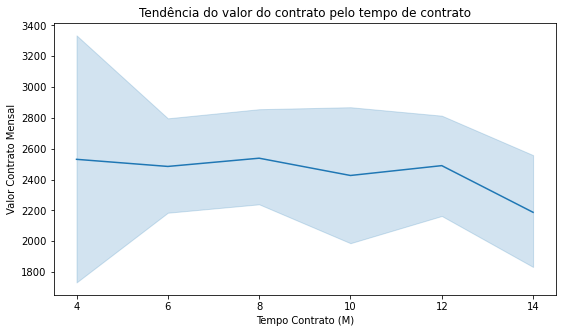

In [41]:
plt.figure(figsize=(9,5))

# plot gráfico de linha da tendência total
sns.lineplot(data=df_SFC, x='Tempo Contrato (M)', y='Valor Contrato Mensal');
plt.title('Tendência do valor do contrato pelo tempo de contrato')

plt.show()

A segunda hipótese criada para o faturamento de cada área se manter na mesma ordem da quantidade de contratos fechados por área não é válida, apesar da figura 1 o gráfico ter uma leve tendência decrescente, apresenta grande dispersão nos valores de contrato por mês e também a linha de média desses valores se mantém numa faixa com pouca variação no valor, apresentando mudanças mais significativas em contratos de 14 meses de duração.
Sendo assim, a tendência será de lucrar mais com contratos de longa duração, o que parece ser um pouco óbvio, no entanto essa hipótese poderia ser a resposta para o comportamento do faturamento por área respeitar os fechamentos de contrato por área.

Antes de tentar validar a primeira hipótese, irei tentar ver o comportamento do faturamento total pelo tempo de contrato.

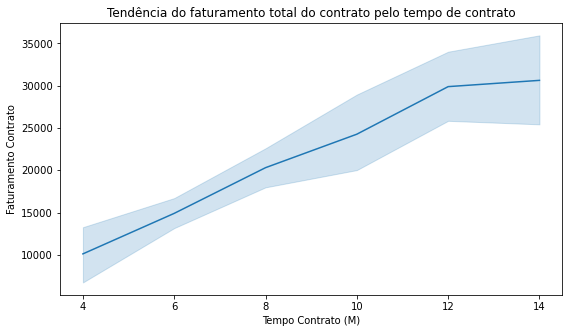

In [42]:
plt.figure(figsize=(9,5))

# plot gráfico de linha da tendência total
sns.lineplot(data=df_SFC, x='Tempo Contrato (M)', y='Faturamento Contrato');
plt.title('Tendência do faturamento total do contrato pelo tempo de contrato')

plt.show()

Aqui só reafirmou que quanto maior o tempo de contrato maior o faturamento.

----
Está bem, agora será a hora de testar a primeira hipótese e para isso, será utilizado a ferramenta boxplot, já utilizado antes para verificar o número de contratos fechados por funcionário, que agora será utilizado para verificar o faturamento total por contrato. Junto a isso, será utilizado o comando Describe para obter informações mais detalhadas da métricas estatísticas do conjunto.

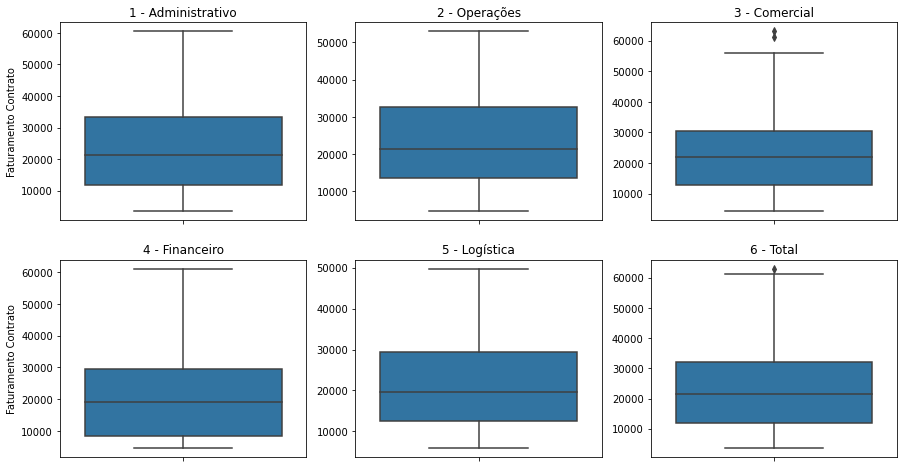

In [43]:
plt.figure(figsize=(15,8))

# boxplot administrativo
plt.subplot(2, 3, 1)
sns.boxplot(y=df_SFC[df_SFC['Area']=='Administrativo']['Faturamento Contrato'])
plt.title('1 - Administrativo')

# boxplot operações
plt.subplot(2, 3, 2)
sns.boxplot(y=df_SFC[df_SFC['Area']=='Operações']['Faturamento Contrato'])
plt.title('2 - Operações')
plt.ylabel('') 

# boxplot comercial
plt.subplot(2, 3, 3)
sns.boxplot(y=df_SFC[df_SFC['Area']=='Comercial']['Faturamento Contrato'])
plt.title('3 - Comercial')
plt.ylabel('') 

# boxplot financeiro
plt.subplot(2, 3, 4)
sns.boxplot(y=df_SFC[df_SFC['Area']=='Financeiro']['Faturamento Contrato'])
plt.title('4 - Financeiro')

# boxplot logística
plt.subplot(2, 3, 5)
sns.boxplot(y=df_SFC[df_SFC['Area']=='Logística']['Faturamento Contrato'])
plt.title('5 - Logística')
plt.ylabel('') 

# boxplot logística
plt.subplot(2, 3, 6)
sns.boxplot(y=df_SFC['Faturamento Contrato'])
plt.title('6 - Total')
plt.ylabel('') 

plt.show()

In [44]:
# lista para rotular cada describe no faturamento total dos contratos
lista_areas = ['Administrativo', 'Operações', 'Comercial', 'Financeiro', 'Logística']
# for para fazer o describe das áreas
for area in lista_areas:
    print(f'Área {area}')
    display(df_SFC[df_SFC['Area']==area]['Faturamento Contrato'].describe())
    
# describre do total
print(f'Total')
display(df_SFC['Faturamento Contrato'].describe())

Área Administrativo


count       63.000000
mean     24250.000000
std      14885.094406
min       3510.000000
25%      11700.000000
50%      21330.000000
75%      33300.000000
max      60480.000000
Name: Faturamento Contrato, dtype: float64

Área Operações


count       48.000000
mean     23806.875000
std      13163.835721
min       4680.000000
25%      13567.500000
50%      21240.000000
75%      32512.500000
max      52920.000000
Name: Faturamento Contrato, dtype: float64

Área Comercial


count       44.000000
mean     24492.272727
std      15344.597544
min       4320.000000
25%      12825.000000
50%      22095.000000
75%      30420.000000
max      63000.000000
Name: Faturamento Contrato, dtype: float64

Área Financeiro


count       42.000000
mean     21426.428571
std      13987.477644
min       4500.000000
25%       8437.500000
50%      19080.000000
75%      29565.000000
max      61110.000000
Name: Faturamento Contrato, dtype: float64

Área Logística


count       40.00000
mean     21777.75000
std      12188.74144
min       5850.00000
25%      12442.50000
50%      19575.00000
75%      29407.50000
max      49770.00000
Name: Faturamento Contrato, dtype: float64

Total


count      237.000000
mean     23287.594937
std      13990.569331
min       3510.000000
25%      11970.000000
50%      21330.000000
75%      31950.000000
max      63000.000000
Name: Faturamento Contrato, dtype: float64

Com essas visualizações através do boxplot e através das métricas estatísticas, consegue-se entender melhor o por que do gráfico de faturamento total por área seguir a mesma ordem do gráfico de total de contratos fechados por área.
 - Em um ponto de vista geral, todos os quartis das áreas não possuem grandes diferenças dos quartis da média total, o que corrobora para manter a maior parte da população de faturamento dos contratos dentro de uma faixa padrão a todos.
 - Mediana (Segundo Quartil 50%) de todas as áreas muito próximas, facilitando novamente a padronização nos faturamentos por contrato.
 - Máximo e mínimo próximos sem muitos desvios também.
 
Dessa maneira consegue-se compreender o porque do faturamento total de cada área obedecer tal ordem.

In [45]:
# base de dados serviços, funcionário e  clientes
df_SFC.head()

,ID Funcionário,ID Cliente,Tempo Contrato (M),Valor Contrato Mensal,Faturamento Contrato,Estado Civil,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Folha Salarial
0,67,1,14,540,7560,C,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,21629.72
1,67,78,6,1710,10260,C,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,21629.72
2,67,125,8,1710,13680,C,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,21629.72
3,67,175,6,945,5670,C,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,21629.72
4,17,2,12,1260,15120,S,15718,7859.0,3143.6,176,628.32,Coordenador,Logística,27524.92


## Relação salário x contratos fechados
Visualizando novamente os dados, um questionamento surge:
  - Será que os funcionários que ganham mais, fecham mais contratos?

Para isso, será criado primeiramente uma base de dados para que realiza uma contagem e possibilite a mescla com uma segunda base de dados com apenas os funcionários e seus salários agrupados.

In [46]:
# criar base de dados para contagem de fechamento de contratos
df_contrato = pd.DataFrame(df_SFC['ID Funcionário'].value_counts())

# renomendo coluna que vem com nome erroneo
df_contrato.rename(columns={'ID Funcionário':'Contratos'}, inplace=True)

# com finalidade de mesclar posteriormente, criada uma nova coluna do ID de Funcionários utilizando o index,
# que é o próprio ID
df_contrato['ID Funcionário'] = df_contrato.index

df_contrato.head()

,Contratos,ID Funcionário
47,6,47
37,5,37
84,5,84
4,5,4
54,4,54


In [47]:
# agrupando os dados pelos ID de Funcionários através da média e filtrando somente o salário
df_salario = pd.DataFrame(df_SFC.groupby('ID Funcionário').mean()['Salario Base'])

df_salario.head()

,Salario Base
ID Funcionário,
1,21910.0
3,16066.0
4,21305.0
5,5098.0
7,17875.0


In [48]:
# mesclando os dois data frames criados através do ID do Funcionário
df_salario_contrato = df_salario.merge(df_contrato, on='ID Funcionário')

df_salario_contrato.head()

,ID Funcionário,Salario Base,Contratos
0,1,21910.0,1
1,3,16066.0,2
2,4,21305.0,5
3,5,5098.0,1
4,7,17875.0,4


Agora que se tem o data frame com o contratos fechados por cada funcionário e seu respectivo salário, será possível analisar essas duas relações através de gráficos.

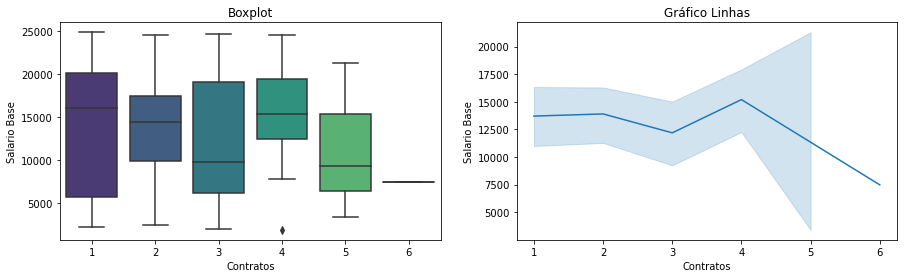

In [49]:
plt.figure(figsize=(15,4))

# boxplot do salario x contratos
plt.subplot(1,2,1)
sns.boxplot(data=df_salario_contrato, x = 'Contratos', y = 'Salario Base', palette='viridis')
plt.title('Boxplot')

# lineplot do salario x contratos
plt.subplot(1,2,2)
sns.lineplot(data=df_salario_contrato, x = 'Contratos', y = 'Salario Base')
plt.title('Gráfico Linhas')

plt.show()

A partir dos gráficos observa-se que não há uma realação linear entre o salário e o número de contratos fechados. No entanto, há algumas informações que pode-se recolher:
  - Apesar da grande amplitude entre os dados,pode-se perceber que de uma meneira geral os que menos venderam possuem salário maior. No entanto, há também aqueles com mediana e média de salário mais alto que fecharam 4 contratos.
  - Mediana e média de menor salário para a aqueles que fecharam 3 e 5 contratos.

## Análise exploratória dos dados
Neste tópico será realizada uma análise exploratória nos dados em busca de correlações, agrupametos e tendências nos dados. Para isso, será utilizada algumas ferramentas gráficas com o gráfico de pares (pairplot), que correlaciona toda base de dados e permite alguma manipulação visuais nos dados e o mapa de calor (heatmap), que possibilita encontrar o coeficiente de Pearson de correlações e tendência lineares crescentes e decrescentes.

In [50]:
# copia base de dados dos serviços, clientes e funcionários mesclados
df_aed = df_SFC.copy()

In [51]:
# revisando os tipos de cada coluna
df_aed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 236
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID Funcionário         237 non-null    int64  
 1   ID Cliente             237 non-null    int64  
 2   Tempo Contrato (M)     237 non-null    int64  
 3   Valor Contrato Mensal  237 non-null    int64  
 4   Faturamento Contrato   237 non-null    int64  
 5   Estado Civil           237 non-null    object 
 6   Salario Base           237 non-null    int64  
 7   Impostos               237 non-null    float64
 8   Beneficios             237 non-null    float64
 9   VT                     237 non-null    int64  
 10  VR                     237 non-null    float64
 11  Cargo                  237 non-null    object 
 12  Area                   237 non-null    object 
 13  Folha Salarial         237 non-null    float64
dtypes: float64(4), int64(7), object(3)
memory usage: 27.8+ KB


As colunas ID Funcionário e ID Cliente são umas das informações mais importantes do data frame. No entanto, ela será reconhecida como um valor pelos ferramentas gráficas, o que seria errado pois ela é uma identificação e não terá nenhum contexto deixá-la. Por isso, será retirada do data frame.

In [52]:
# drop nas colunas e ID Funcionário e ID Cliente
df_aed.drop(['ID Funcionário','ID Cliente'], axis = 1, inplace=True)

A biblioteca numpy será importada para possibilitar a formatação e obter um heat map mais organizado.

In [53]:
# importando bilbioteca numpy
import numpy as np

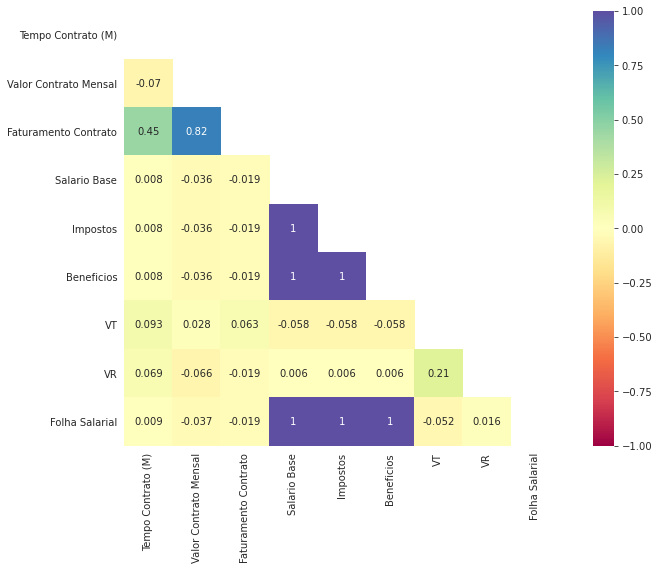

In [54]:
# criando máscara para não espelhar as correlações no canto superior direito
corr = df_aed.corr()
# criado uma máscara com de matriz vazias de mesmo tamanho da corr do df_aed
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
#heatmap com os máximo e mínimos de acordo com o coeficiente de correlação de Pearson
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, square=True, annot = True, cmap='Spectral')
plt.show()

O coeficiente de Pearson analisa a tendência crescente e decrescente e a linearidade dos dados. Ele tem um range de de 1 a -1, onde 1 ele apresenta uma correlação crescente completamente linear e -1 decrescente completamente linear.

Analisando o heatmap acima, percebe-se que todos os dados, excluindo o VT e o VR, correlacionados aos gastos com a folha salarial, possuem uma correlação totalmente linear e crescente entre si de 1. 

 - Coef. Pearson =  Salário Base x Imposto x Benefícios x Folha Salarial = 1

Isso significa que, quanto maior o Salário do funcionário, maior será o imposto e também maior será o beneficio.

Como já analisado anteriormente e já era esperado, o Faturamento por Contrato possui uma Relação crescente levemente linear de 0.45 de coeficiente. Também, com uma correlação de 0.82, o Faturamento por Contrato com o Valor de Contrato tem uma relação crescente quase linear.

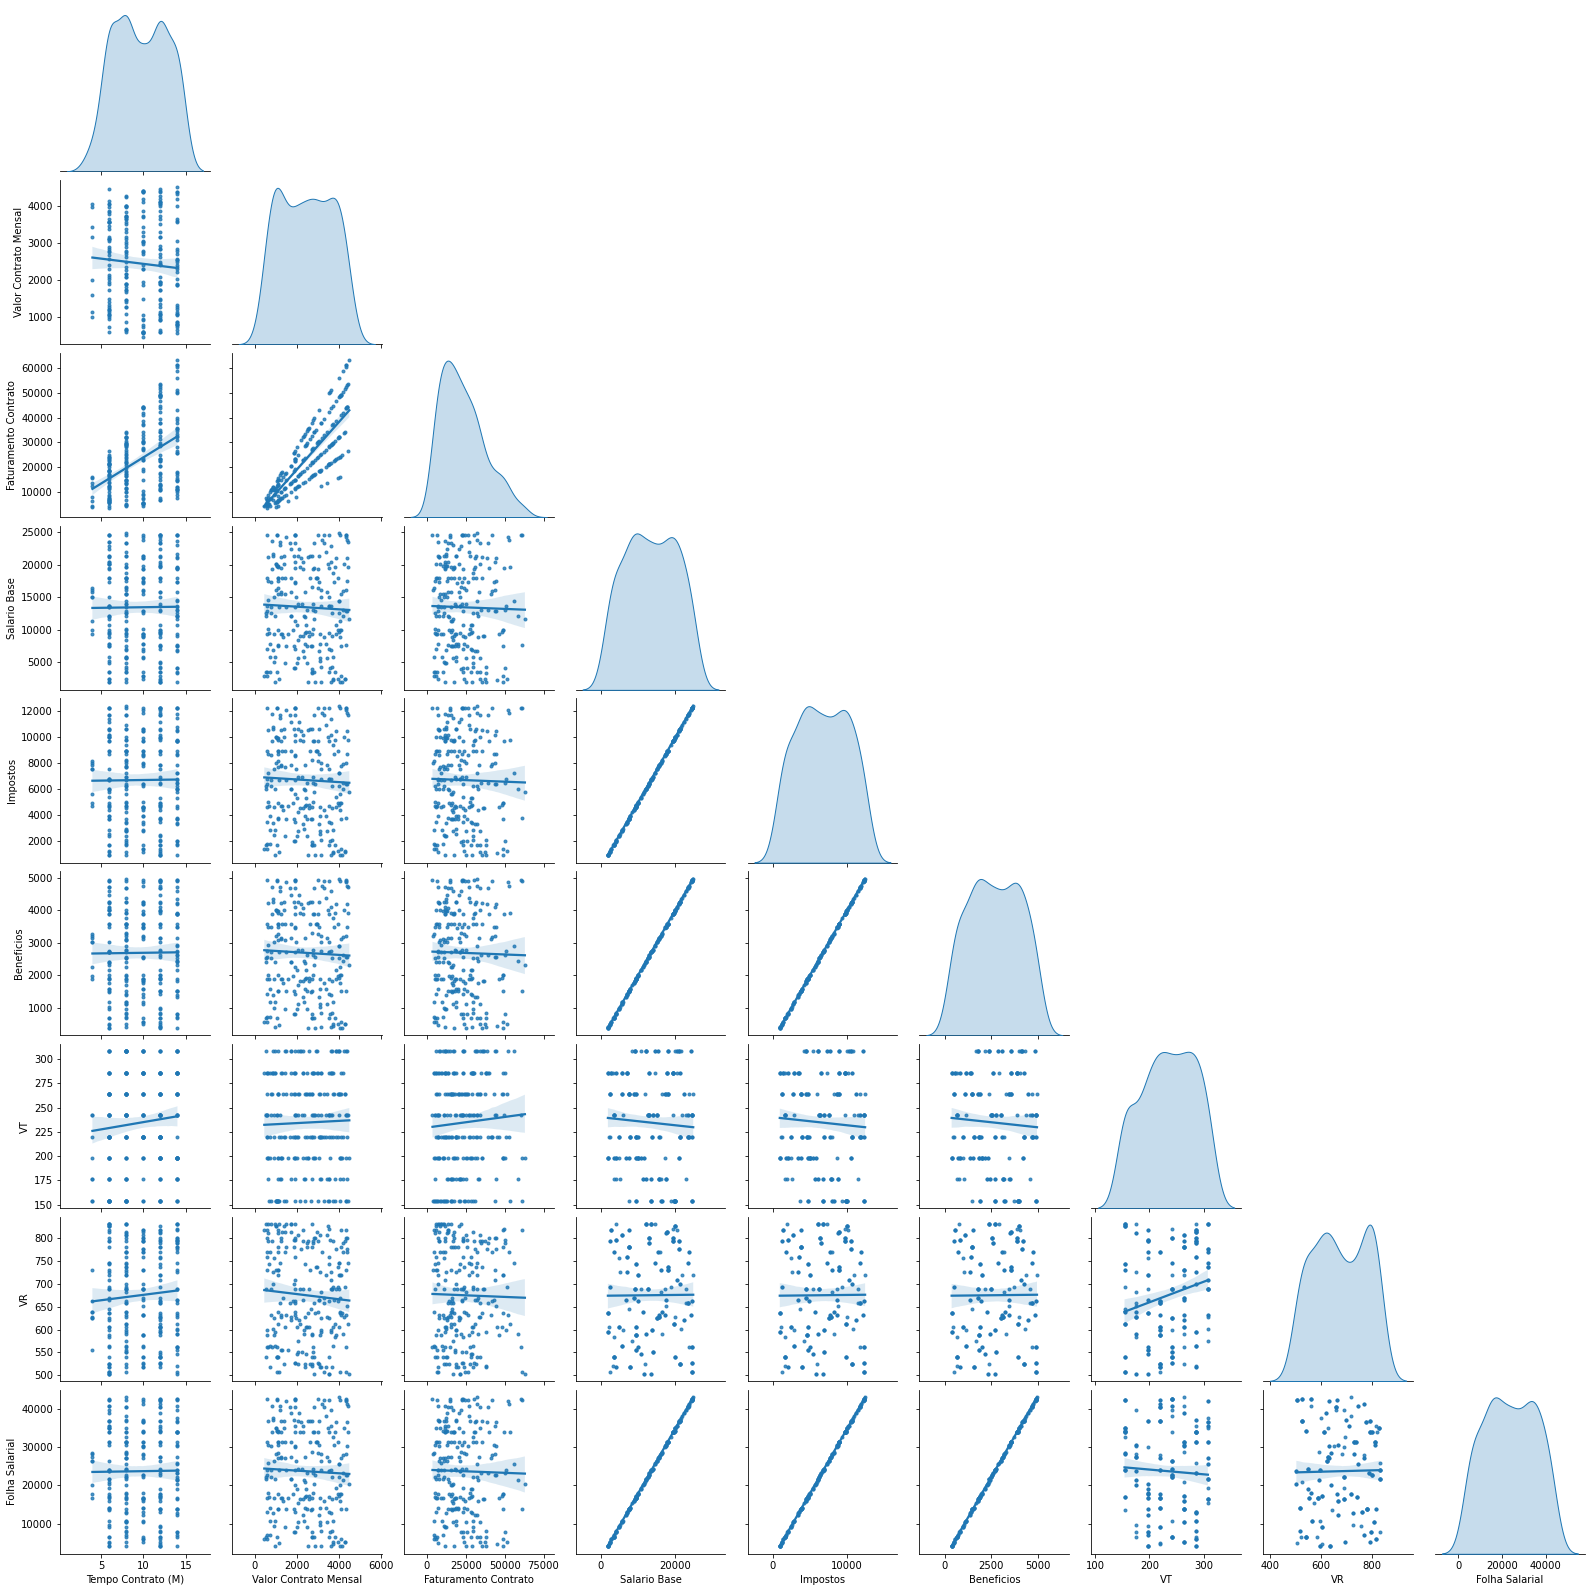

In [55]:
# pair plot da base de dados 
sns.pairplot(data=df_aed, corner = True, diag_kind='kde', kind='reg', markers='.')
plt.show()

Em uma análise dos gráficos de distribuições normais que a função pairplot forneceu, pode-se retirar as seguintes informações:
   - O gráficos de distribuição desmontra claramente as correlações e tendências lineares correspondentes ao coeficiente de Pearson comentados acima.
   - A distribuição normal das colunas não possuem médias bem definidas e a algumas parecem ter um pequena tendência a uma distribuição bimodal, no entanto, sem definição.
   - As distribuições normais possui uma grande variância.
 
Analisando os gráficos de dispersão e ajuste linear:
   - As colunas que apresentaram correlações lineares no coeficiente de Pearson disponibilizado pelo heatmap ficam melhores ilustradas e essas correlações mais visíveis na plotagem desses gráficos de dispersão e seu ajuste linear.
   - Visualmente os pontos da maioria das colunas estão bem dispersos, condizendo com suas respectivas distribuições normais que apresentam grande dispersão.
   - De um modo geral, os ajustes das dispersões apresentam inclinações pequenas ou praticamente constantes.
   - Como analisado anteriormente, o ajuste do valor do contrato mensal pelo tempo de contrato possui uma leve inclinação decrescente.

- A partir dessa análises, pensando em algum método preditivo, talvez seja possível predizer os Impostos da empresa ou o Faturamento por Contrato.

- A princípio, sem nenhuma divisão dos dados de acordo com alguma classe, não há uma divisão clara nos dados.

Eu fiquei pensando também se há uma divisão nos dados de acordo com as seguintes classes
   - Estado civil
   - Setor/Área
   - Cargo

Por isso, será feito uma análise utilizando o parâmetro "hue" em cada coluna de classe mencionada acima, que dividirá os dados de acordo com cada classe dentro dessas colunas.

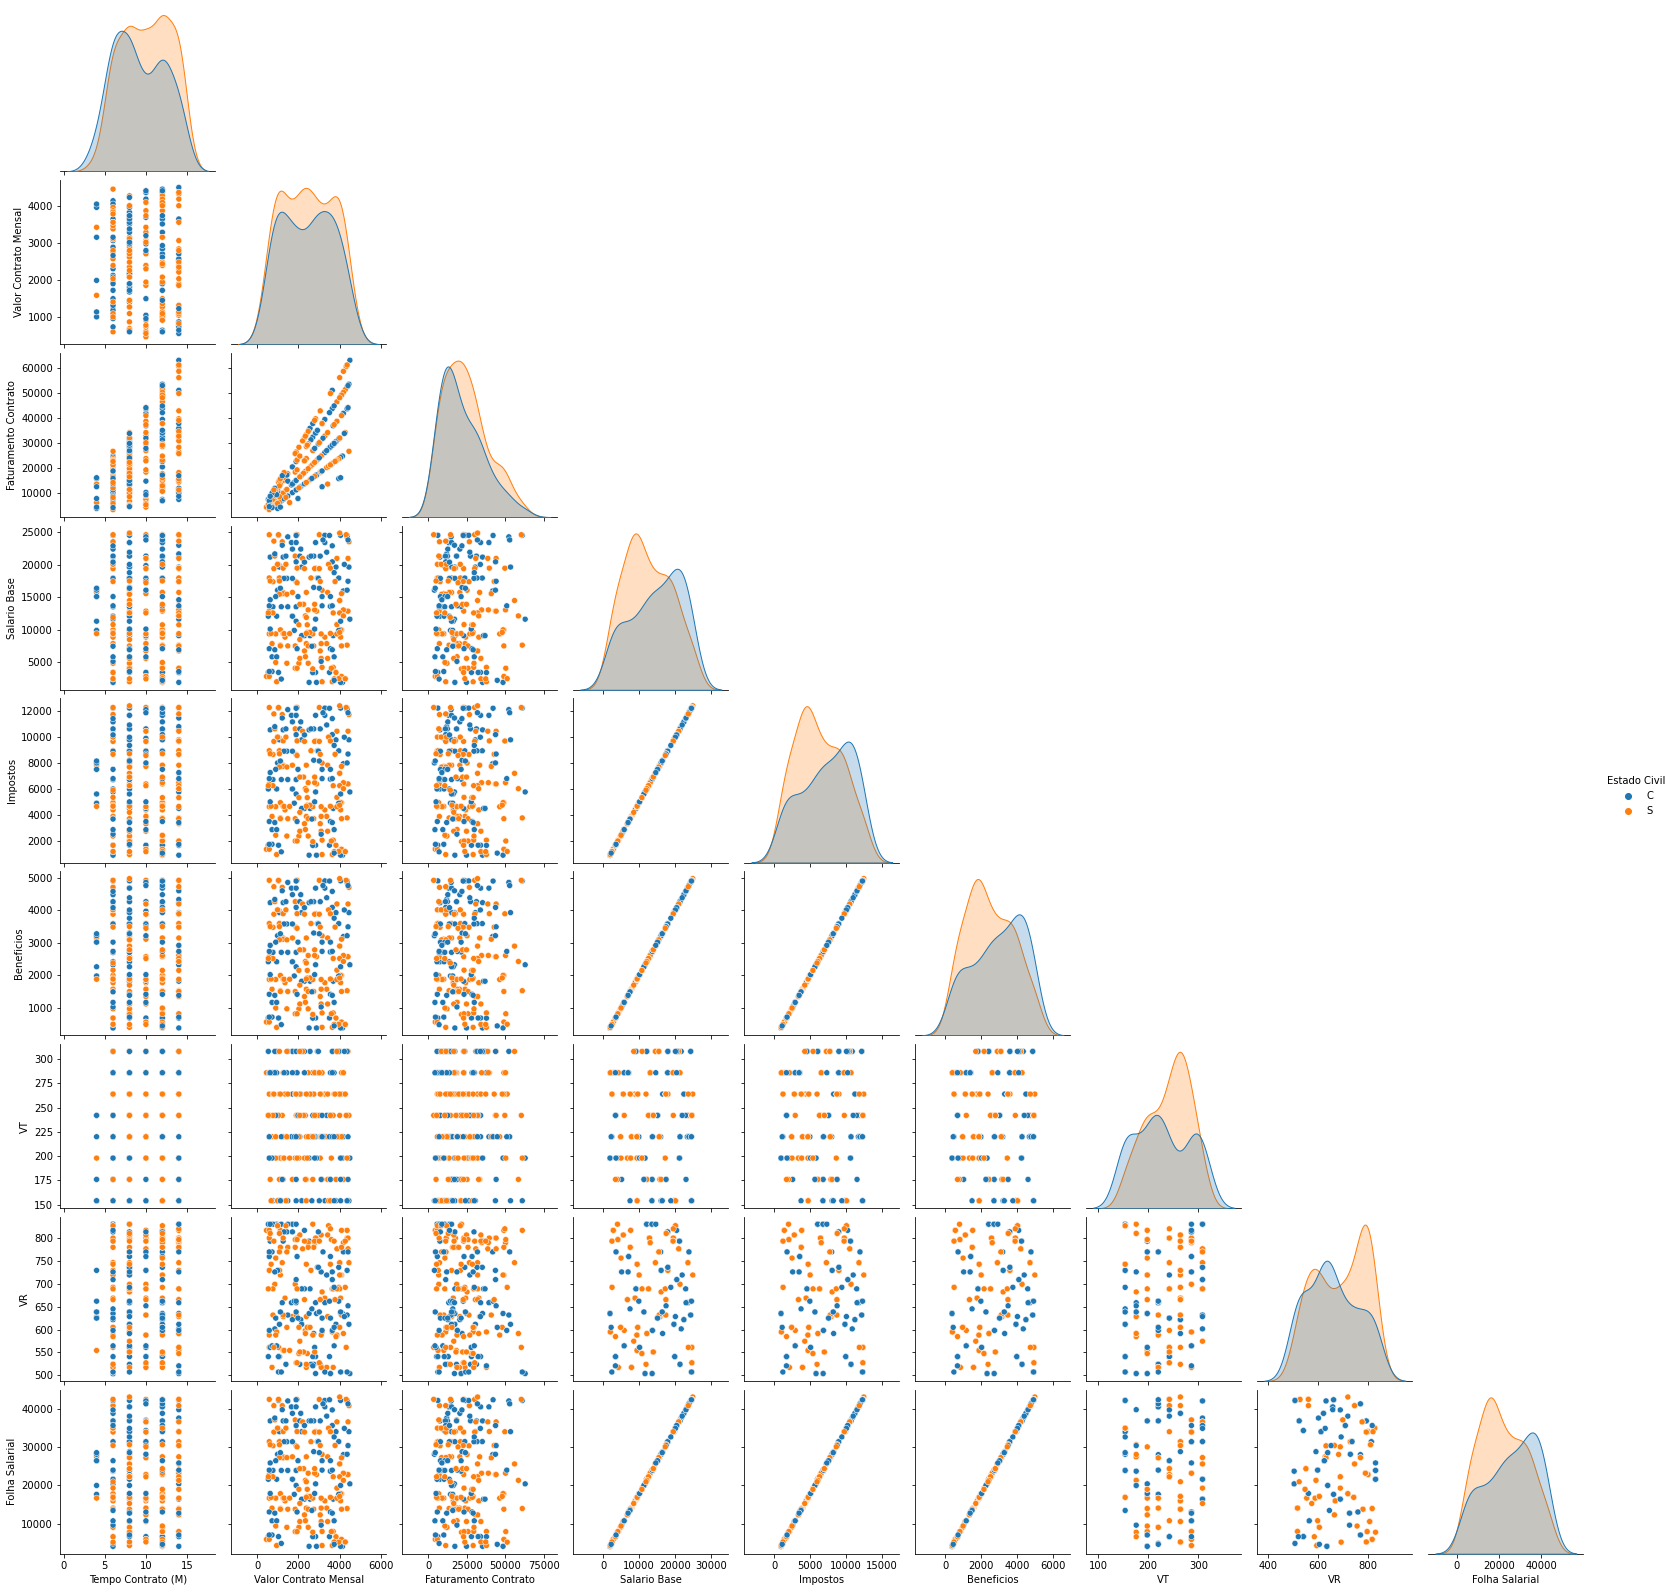

In [56]:
# pair plot da base de dados divido no estado civil
sns.pairplot(data=df_aed, corner = True, diag_kind='kde', hue='Estado Civil')
plt.show()

A divisão das classes nos dados em relação ao ESTADO CIVIL não é muito clara, tanto na distribuição normal quanto nos diagramas de dispersão, possuindo muita sobreposição de classes.

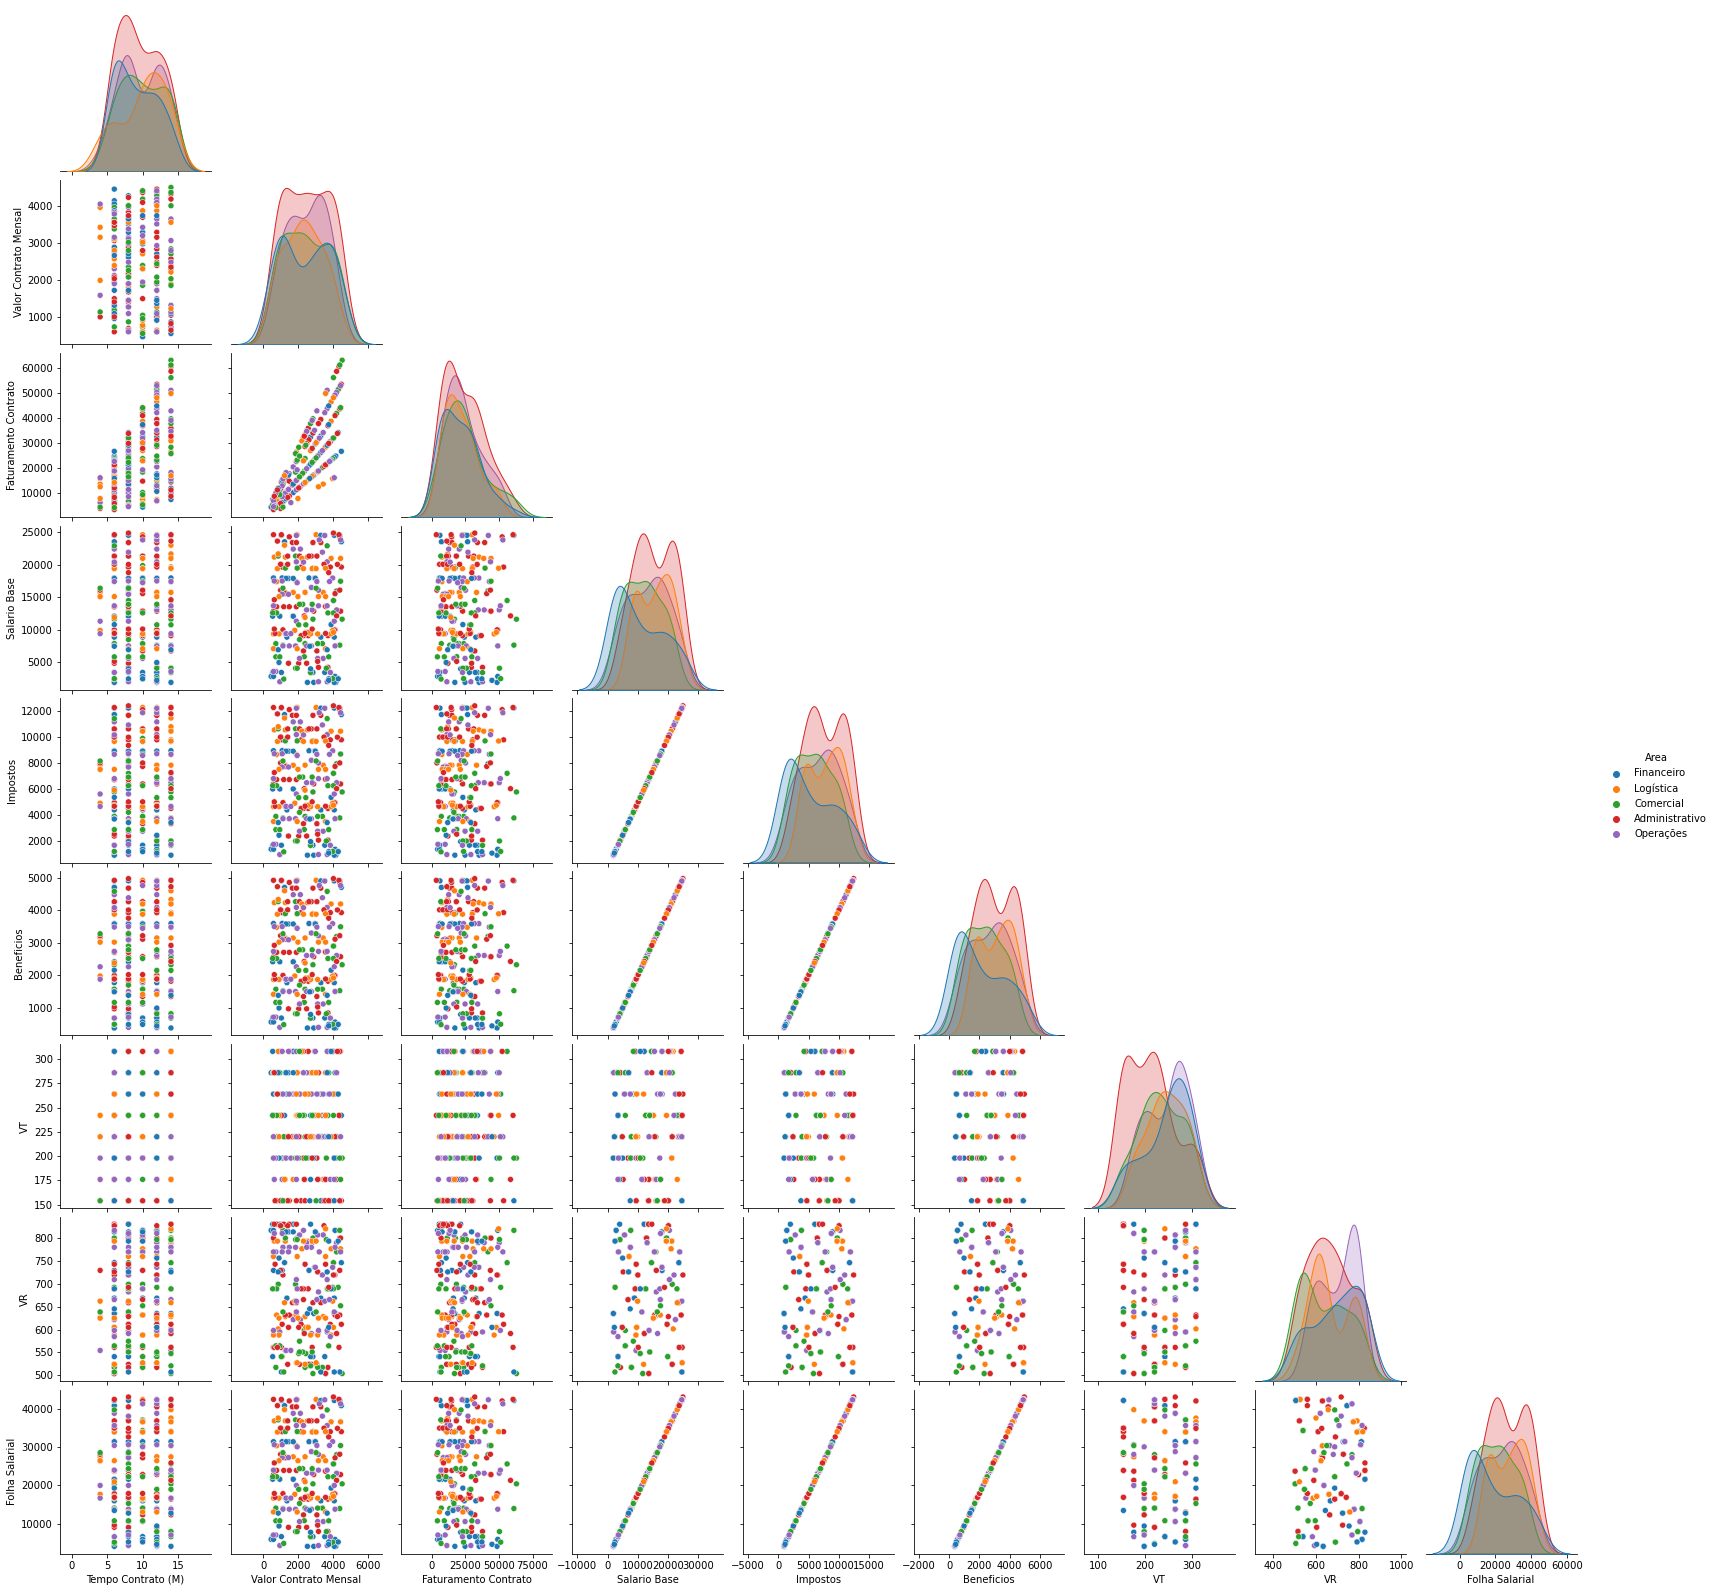

In [57]:
# pair plot da base de dados divido nas áreas
sns.pairplot(data=df_aed, corner = True, diag_kind='kde', hue='Area')
plt.show()

Não há uma divisão clara nos dados por cada setor, o que impossibilita usar algum modelo classificatório para predizer a área dos funcionários.

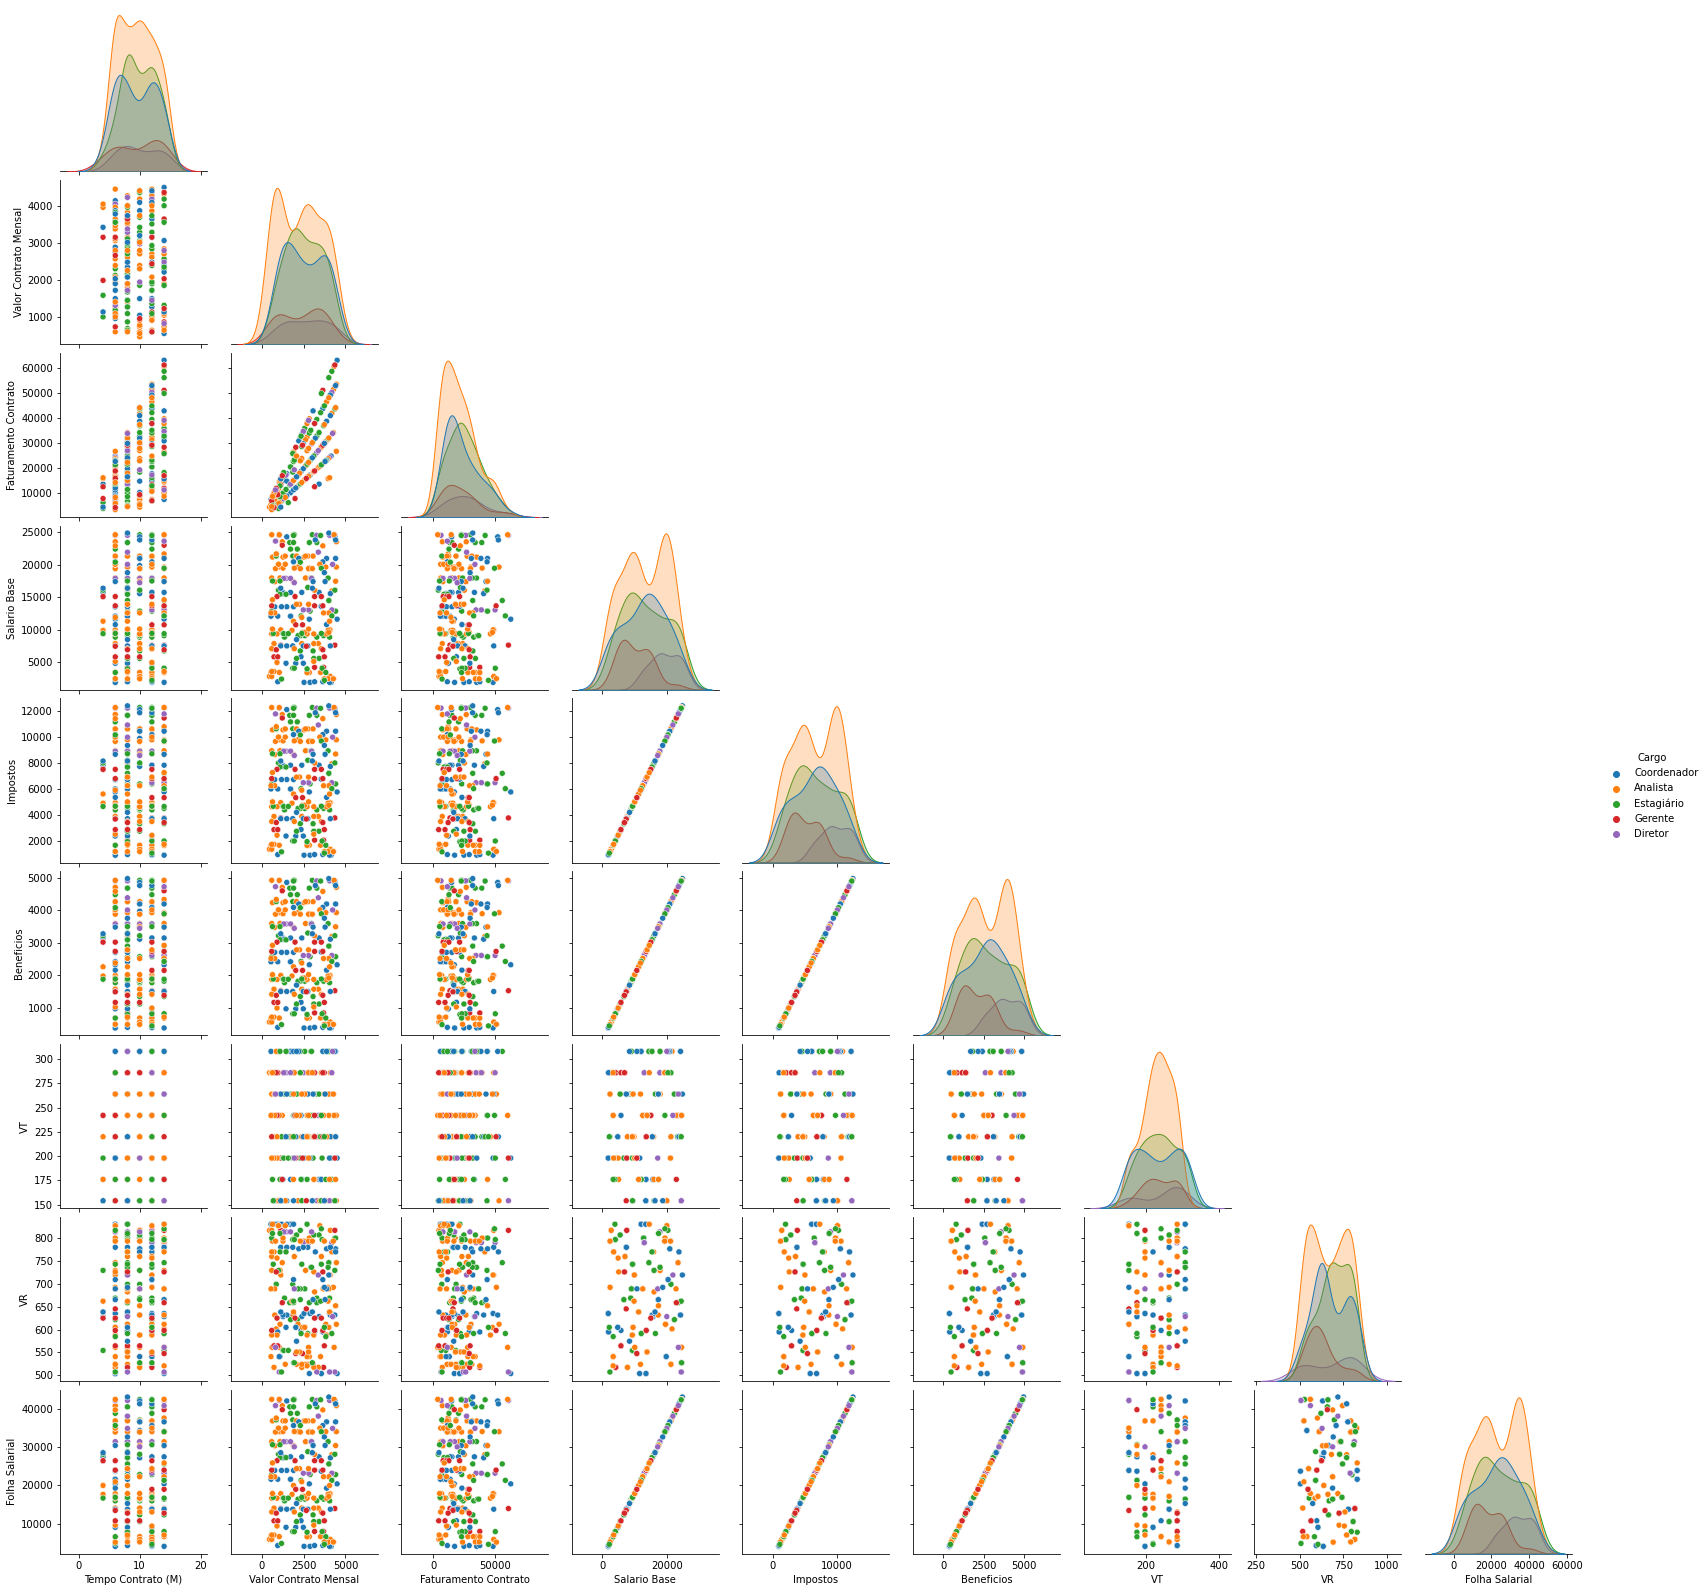

In [58]:
# pair plot da base de dados divido nas cargos
sns.pairplot(data=df_aed, corner = True, diag_kind='kde', hue='Cargo')
plt.show()

Na divisão dos dados em cargos de cada funcionário, apesar da sobreposição, há uma divisão mais clara nos dados principalmente nas distribuições normais.
Isso pode possiblitar o uso de algum modelo classificatório para classificar o cargo de cada setor. No entanto, uma análise mais profundo dos dados visando esse dividir os cados por cargo pode ser feita.

## Preparo dos dados, treinamento e avaliação do modelo de classificação
O objetivo neste tópico será criar um modelo de aprendizado supervisionado de máquina para classificar os cargos de cada funcionário de acordo com cada venda.
Primeiramente, será feito o preparo dos dados para o treinamento, realizando uma limpeza nos outliers, analisar o balanceamento dos dados e eliminando colunas que podem atrapalhar no aprendizado de máquina.

### Análise de outliers
Para a identificação de outliers será utilzado o gráfico boxplot, os pontos fora do limite da cauda do boxplot será identificado como outlier. Em seguida, será feito o cálculo do limite utilizando as equações:

 - Limite Inferior = Primeiro Quartil – 1,5 * (Terceiro Quartil – Primeiro Quartil)
 - Limite Superior = Terceiro Quartil + 1,5 * (Terceiro Quartil – Primeiro Quartil)

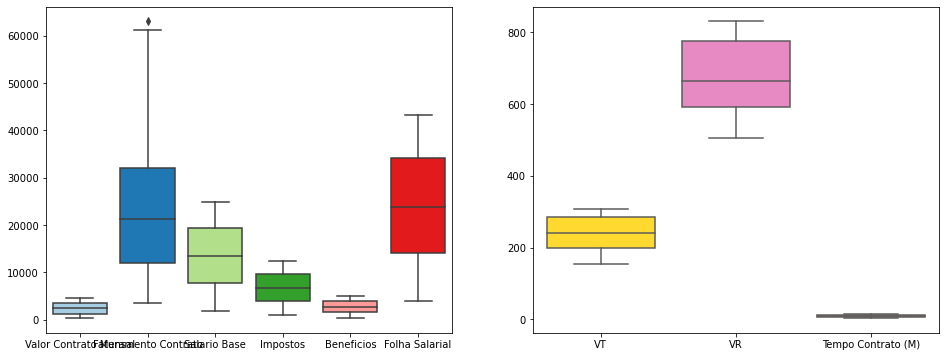

In [59]:
# plot do df_aed dividido em dois boxplots de acordo com a escala de cada coluna 
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.boxplot(data=df_aed.drop(['VT','VR', 'Tempo Contrato (M)'], axis=1), palette='Paired', saturation=1)

plt.subplot(1,2,2)
sns.boxplot(data=df_aed[['VT','VR', 'Tempo Contrato (M)']], palette='Set2_r', saturation=1)

plt.show()

A coluna do faturamento por contrato possui um outlier e, para saber se elimino ele ou não, irei ver a que classe de Cargo ele pertence, pois se pertencer as classes marjoritárias, será eliminado, senão, será substituido.

In [60]:
# função criada para calcular os limites superiores e inferiores para eliminação de outliers.
def limites_out(dados):
    # unpacking dos quartis utilizando a função np percentile que calcula o valor dos dados no percentual colocado
    q3, q1 = np.percentile(dados, [75, 25])
    sub = q3 - q1
    lim_inf = q1 - (sub * 1.5)
    lim_sup = q3 + (sub * 1.5)
    # retorna um list comprehension dos dados a serem eliminados
    return print(f'Limite inferior: {lim_inf}\nLimite superior: {lim_sup}')

In [61]:
limites_out(df_aed['Faturamento Contrato'])

Limite inferior: -18000.0
Limite superior: 61920.0


O limite inferior é zero, então o cálculo feito pela função não se aplica.

In [62]:
# analise da classe do outlier
df_aed[df_aed['Faturamento Contrato']>61920.0][['Faturamento Contrato', 'Cargo']]

,Faturamento Contrato,Cargo
36,63000,Coordenador


O faturamento para a classe de cargo Coordenador de R$63000 é muito fora dos padrões do faturamento da classe, então poderá ser alterado ou ser substituído por algum valor pertencente da classe coordenador.

Como não há tantos dados, irei substituir o valor pela valor da maior venda do grupo de coordenadores.

In [63]:
# valor máximo dos coordenadores com excesso do outlier (63000)
df_aed[df_aed['Cargo']=='Coordenador']['Faturamento Contrato'].sort_values(ascending=False)[:2]

36     63000
128    52920
Name: Faturamento Contrato, dtype: int64

In [64]:
# outlier recebendo o valor do faturamento máximo dos coordenadores
df_aed.loc[36,'Faturamento Contrato'] = 52920

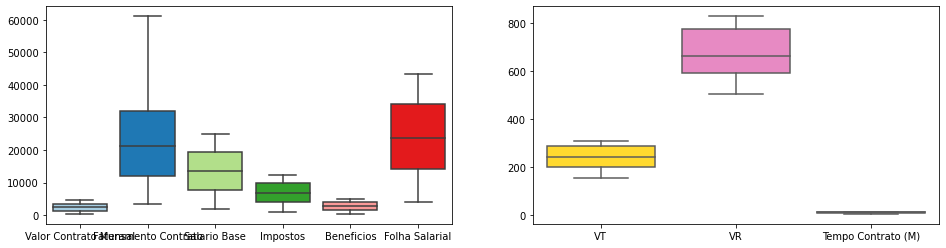

In [65]:
# plot do df_aed dividido em dois boxplots de acordo com a escala de cada coluna 
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.boxplot(data=df_aed.drop(['VT','VR', 'Tempo Contrato (M)'], axis=1), palette='Paired', saturation=1)

plt.subplot(1,2,2)
sns.boxplot(data=df_aed[['VT','VR', 'Tempo Contrato (M)']], palette='Set2_r', saturation=1)

plt.show()

Com o boxplot acima, pode-se perceber que foi eliminado o outlier da coluna Faturamento por Contrato.

### Divisão dos dados
Os dados serão divididos em dados de treino e dados de teste, onde se fará uma divisão de 80% dos dados para treino e 20% para teste. Para isso, será utilizada a biblioteca Scikit Learn, que possui diversas ferramentas de e para modelos de Machine Learning.

In [66]:
# da bilbioteca scikit-learn, importe a função x do módulo model_selection
# já foi importada função para divisão dos dados, escolha de hiperparâmetros e avaliação do modelo, como é do mesmo módulo
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

In [67]:
# seleção dos dados a serem classificados
y = df_aed['Cargo']
# seleção das dados correlacionados
X = df_aed.drop(['Cargo','Area','Estado Civil'], axis = 1)

In [68]:
# visualização dos dados X e y
display(X[:2],y[:2])

,Tempo Contrato (M),Valor Contrato Mensal,Faturamento Contrato,Salario Base,Impostos,Beneficios,VT,VR,Folha Salarial
0,14,540,7560,12054,6027.0,2410.8,308,829.92,21629.72
1,6,1710,10260,12054,6027.0,2410.8,308,829.92,21629.72


0    Coordenador
1    Coordenador
Name: Cargo, dtype: object

In [69]:
# divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Balanceamento das classes
Nesta etapa será verificado o balanceamento das classes e se há a necessidade de realizar alguma técnica de balanceamento de dados para treinar o modelo. A necessidade do balanceamento é dada para evitar que o modelo de classificação não consiga classificar as classes minoritárias que possuem grande desvenjagem te número de dados perante aos marjoritários, esse problema é denominado de Paradóxido da Acurácia.

O balanceamento será analisado através de uma simples projeção de um gráfico de histograma.

Serão testadas dois métodos de balanceamentos, o SMOTE e o RandomOverSample, ambos pertencem a biblioteca imbalanced-learn, que fornece ferramentas para lidar com dados desbalanceados.

#### SMOTE:
SMOTE (Synthetic Minority Oversampling Technique), em português Técnica de Sobreamostragem de Minorias Sintéticas, é uma técnica de balanceamento de dados onde ele seleciona uma classe minoritária e basicamente seleciona k vizinhos próximos e cria pontos sintéticos entre esses pontos.

#### RandomOverSample:
Recria novos dados da classe minoritária, normalmente ele simplesmente copia os dados da classe até se igualar as outras. Por justamente copiar os valores, acaba se tornando eficiente para balancear classes sem grande variação nos dados, senão podem ficar muito bons em identificar um caso específico e no geral, não.


In [70]:
# importando a biblioteca imblearn
import imblearn as imb

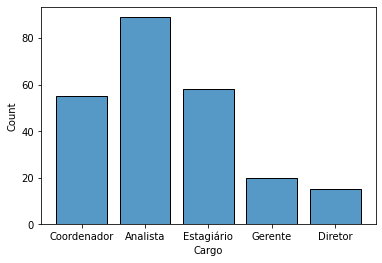

In [71]:
# balanceamento dos dados a serem estimados
sns.histplot(df_aed['Cargo'], shrink=.8)
plt.show()

A classe marjoritária de cargos é a de analista,respectivamente estagiário e coordenador que estão relativamente balanceadas. Para as classes minoritárias, os cargos de diretor e gerente possuem uma discrepância de quantidade funcionários com esses cargos bem alta em relação aos outros, o que já esperado.

In [72]:
# chamando a função smote e fixando a semente de aletoriedade
smote = imb.over_sampling.SMOTE(random_state=42)

# unpacking do balanceamento dos dados de treino com a função smote
X_smote, y_smote = smote.fit_sample(X_train, y_train)

<AxesSubplot:xlabel='Cargo', ylabel='Count'>

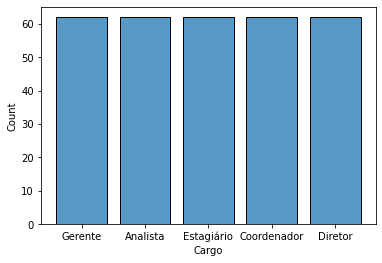

In [73]:
# histograma dados balanceados com smote
sns.histplot(y_smote, shrink=.8)

In [74]:
# chamando a função ROS e fixando a semente de aletoriedade
ros = imb.over_sampling.RandomOverSampler(random_state=42)

# unpacking do balanceamento dos dados de treino com a função ROS
X_ros, y_ros = ros.fit_sample(X_train, y_train)

<AxesSubplot:xlabel='Cargo', ylabel='Count'>

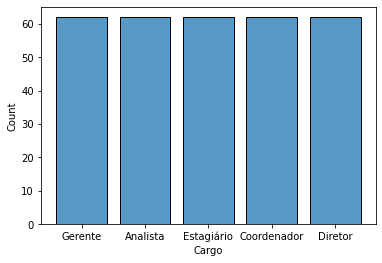

In [75]:
# histograma dados balanceados com ROS
sns.histplot(y_ros, shrink=.8)

### Escolha do melhor modelo

Nesta etapa, será criada uma função utilizando validação cruzada com finalidade de obter o melhor modelo de classificação de ML.
Como as classes posseum grande sobreposição de dados, há diversos modelos como Máquina de Vetor Suporte (SVM), Modelo de Mistura Gaussian (GMM), Regressão Logística Multiclasse, e Análise Discriminante Linear que acredito que dependem muito de classes pelo menos ligeiramente separadas, que é o ideal, mas não é o caso. Por isso, selecionei dois algoritmos que acredito que possam se sair bem nesse tipo de situação:

- Árvore de Decisão:

O modelo de árvore de decisões assemelha-se a um fluxograma, onde cada nó é uma prova que de acordo com uma característica que distingua uma classes dividirá em novos nós até chegar nó final. Essas divisões ocorrer de acordo com um parâmetro de qualidade de divisão de "gini" e "entropy". No geral, o modelo de Florestas Aleatórias é mais eficiente que ele, no entanto, o algoritmo de árvore de decisões é mais econômico de memória e se a diferença não for tão grande nos resultados, por que não usar? Além de que para fins comparativos de desempenho é bem interessante.

- Florestas Aleatórias:

Um dos algoritmos mais utilizados, simples e eficiente. As florestas aleatórias é um ensenmble das árvores de decisões, que faz uma boa separação de classes através de ra de etropia ou impureza de gini, portanto diversas árvores que possuem perspectivas diferentes de cada classe, conseguem identificar melhor a classe de um dado.

- K-Vizinhos Próximos (KNN):

Outro modelo bem comum, que acredito que trabalhará bem diante da sobreposição é o KNN, que diz basicamente que um ponto percenterá a uma classe se seus vizinhos mais próximos (distância) pertencerem a essa classe. Visando isso, acredito que talvez possa ser um bom modelo principalmente para classes miniritárias.

In [76]:
# importação do modelo de árvore de decisões
from sklearn.tree import DecisionTreeClassifier

# importação do modelo de florestas aleatórias
from sklearn.ensemble import RandomForestClassifier

# importação do modelo de K-Vizinhos Próximos
from sklearn.neighbors import KNeighborsClassifier

In [77]:
# criação da lista que irá conter os modelos
modelos = []

# adição de uma tupla dos modelos na lista de modelos
modelos.append(('dtc', DecisionTreeClassifier()))
modelos.append(('rfc', RandomForestClassifier()))
modelos.append(('knn', KNeighborsClassifier()))

print(modelos)

[('dtc', DecisionTreeClassifier()), ('rfc', RandomForestClassifier()), ('knn', KNeighborsClassifier())]


In [78]:
# função para obter o melhor modelo apartir da validação cruzada
def select_best_model(list_modelos):
    """list_models: é crucrial ter uma lista de tuplas na formatação: \n [(nome_modelo_1, função_modelo_1),(nome_modelo_2, função_modelo_2),(...), (nome_modelo_K, função_modelo_K)]"""
    # dicionário que conterá os resultados da CV
    resultado = dict()
    # for com unpacking da lista de tuplas dos modelos
    for nome, modelo in list_modelos:
        # número de dobras e embaralhmento ativado
        kfold = KFold(n_splits=4, random_state=42, shuffle=True)
        # validação cruzada utilizandos os modelos e dados de treino
        cross = cross_val_score(modelo, X, y, cv=kfold, scoring='f1_macro')
        # add média e desvio na chave "nome" no dicionário resultados
        resultado[nome] = (cross.mean(), cross.std())
    # arranjo e organização da visualização dos resultados
    n = 'NOME'
    f1 = 'F1 MACRO'
    desvio = 'DESVIO'
    print(f'| {n:^10}  |  {f1:^20}  |  {desvio:^10}  |')
    for chave, valor in resultado.items():
        print(f'| {chave.upper():^10}  |  {valor[0]:^20.4f}  |  {valor[1]:^10.4f}  |')

Na validação cruzada, busquei a Macro AVG do F1_score pois ela da uma boa noção de como vai o Recall e Precisão, além de que utilizei a macro pois os dados são desbalanceados, pois se eu usasse a micro os dados marjoritários iriam pesar muito mais na métrica, aumentando ela e deixando de representar todas classes.

O número de dobras utilizados para KFold foi de 4 para garantir a representatividade dos grupos minoritários.

In [79]:
# utiizando função para obter o melhor modelo
select_best_model(modelos)

|    NOME     |        F1 MACRO        |    DESVIO    |
|    DTC      |         0.5818         |    0.0356    |
|    RFC      |         0.6247         |    0.0517    |
|    KNN      |         0.1973         |    0.0345    |


O modelo que apresentou melhor desempenho foi o de Florestas Aleatórias (RFC), com um F1_score de 63,72% e será escolhido para dar continuidade no treinamento do modelo de ML e seleção de hiperparâmetros.

### Escolha de hiperparâmetros

Os hiperparâmetros são parâmetros ajustáveis no treinamento do algoritmo de ML para melhorar a estimativa do modelo. Para fazer essa seleção de hiperparâmetros, será utilizado a função GridSearchCV, que estima o melhor arranjo de parâmetros para o treinamendo do algoritmo de ML.

Princpais hiperparâmetros:
  - n_estimators: número de árvores na floresta
  - max_features: recursos a se considerar ao procurar a melhor divisão
  - max_depth: profundidade máxima da árvore
  - criterion: critério para medir a qualidade da divisão

Código GridSearchCV transformado em Raw NBConvert pois está demorando para rodar.

In [80]:
# função para dar uma facilitada na escolha dos parâmetros
def best_params(parametros, modelo):
    # estruturando o pesquisa de grade com o modelo, lista de parâmetros, dobras e métrica a ser avaliada
    grid_search = GridSearchCV(modelo, parametros, cv = 5, scoring='accuracy')
    # dados a serem utilizados para a pesquisa
    grid_search = grid_search.fit(X_train, y_train)
    
    return grid_search.best_params_

In [81]:
# lista de dicionário dos parâmetros
parametros = [
    {
        'n_estimators':[300,500,600],
        'max_depth':[8,9,10],
        'criterion':['gini', 'entropy', 'log_loss']
    }
]

O melhor critério de divisão das classes foi a entropia, profundidade máxima de cada árvore foi de 9 e número de árvores foi de 600, um número bem alto, mas como o data set não possui uma enorme quantidade de dados, não vai demorar muito.

### Escolha do melhor tipo de balanceamento

Para escolher o melhor balanceamento de dados, será feito um treinamento dos modelos para os balanceamentos RandomOverSample, SMOTE e com os dados desbalanceados.

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
# função ciada pra treinar o modelo de classificação com diversos dados de treinos diferentes e 
def best_balance(lista_treino, modelo):
    """lista_treino: lista no modelo [(nome, X_train, y_train),(...)]"""
    mod = modelo
    # seleção do melhor modelo
    for nome, X_i, y_i in lista_treino:
        # treinamento do modelo
        mod.fit(X_i, y_i)
    
        # classificação utilizando os dados de teste
        y_pred = mod.predict(X_test)
    
        # utilizando a função classification_report para visualizar diversas métricas classificatórias, inclusive por classe
        print(f'Relatório de Classificação {nome}: \n \n{classification_report(y_test, y_pred, digits=4, zero_division=False)}')

Neste caso, foram feito 3 treinos utilizando os dados desbalanceados, balanceados com SMOTE e balanceados com ROS. Os resultados são mostrados abaixo:

In [84]:
# lista contento os dados de treino
train_list = []

# treino random over sampler
train_list.append(('ROS', X_ros, y_ros))

# treino smote
train_list.append(('SMOTE', X_smote, y_smote))

# treino dados normais desbalanceados
train_list.append(('DISBALANCED', X_train, y_train))

In [85]:
# resultados dos melhores dados para treino do algoritmo
best_balance(train_list, RandomForestClassifier(n_estimators=600, criterion='entropy', max_depth= 42))

Relatório de Classificação ROS: 
 
              precision    recall  f1-score   support

    Analista     0.7407    0.7407    0.7407        27
 Coordenador     0.6923    0.6429    0.6667        14
     Diretor     1.0000    0.5000    0.6667         6
  Estagiário     0.5652    0.6842    0.6190        19
     Gerente     1.0000    1.0000    1.0000         6

    accuracy                         0.7083        72
   macro avg     0.7997    0.7136    0.7386        72
weighted avg     0.7282    0.7083    0.7097        72

Relatório de Classificação SMOTE: 
 
              precision    recall  f1-score   support

    Analista     0.8000    0.5926    0.6809        27
 Coordenador     0.5714    0.5714    0.5714        14
     Diretor     0.3333    0.3333    0.3333         6
  Estagiário     0.5714    0.6316    0.6000        19
     Gerente     0.4545    0.8333    0.5882         6

    accuracy                         0.5972        72
   macro avg     0.5461    0.5925    0.5548        72
weigh

#### Equacionário para entender melhor as métricas:

- VP = Verdadeiro positivo
- VN = Verdadeiro negativo
- FP = Falso positivo
- FN = Falso negativo

Equação da Precisão:
   - 𝑃𝑟𝑒𝑐𝑖𝑠ã𝑜 = 𝑉𝑃 / 𝑉𝑃 + 𝐹P
   
Equação do Recall:
   - 𝑅𝑒𝑣𝑜𝑐𝑎çã𝑜 = 𝑉𝑃 / 𝑉𝑃 + 𝐹N
   
Equação do F1_score:
   - 𝐹1 − 𝑆𝑐𝑜𝑟𝑒 = 2 ∗ 𝑃𝑟𝑒𝑐𝑖𝑠ã𝑜 ∗ 𝑅𝑒𝑣𝑜𝑐𝑎çã𝑜 / 𝑃𝑟𝑒𝑐𝑖𝑠ã𝑜 + 𝑅𝑒𝑣𝑜𝑐𝑎ção
   
Acurárica:
   - 𝐴𝑐𝑢𝑟á𝑐𝑖𝑎 = 𝑉𝑃 + 𝑉𝑁 / 𝑉𝑃 + 𝑉𝑁 + 𝐹𝑃 + 𝐹N

Macro AVG:
   - Média aritmética da métrica
   
Micro AVG:
   - Média ponderada da métrica, leva em consideração o support, que é o número de dados da classe nos dados de teste

O método que apresentou piores resultados dos três foi o balanceamento utilizando a técnica SMOTE. Acredito que como há muita sobreposição nos dados, os que foram criados no intermédio dos pontos acabam confundindo o algortimo e fazem até com que confunda esses novos dados com os de outras classes, criando diversos falsos positivos e diminuindo a precisão, principalmente.

Os relatórios de avaliação que apresentaram melhores métricas foram o modelo treinado com dados desbalanceados e o RandomOverSample. No entanto, o modelo treinado com o balanceamento ROS apresentou métricas melhores que o sem balanceamento, apresentando acurácia total maior, mascros e micro médias não só maiores mas também próximas.

A princípio eu acreditava que o método SMOTE seria superior no balanceamento de dados que o ROS, pois ele é mais "sofisticado" que o outro e acaba gerando dados diversificados que poderiam representar melhor o modelo. No entanto, como já citado logo acima, devido a sobreposição das classes nos dados, isso acaba interferindo em outras classes. O que faz com que o método ROS, criando cópias dos dados minoritários reforcem o aprendizado do algoritmo referente aqueles poucos dados da classe minoritária.

Mas, acredito que há um problema nisso, pois talvez o algoritmo fique muito bom em identificar casos específicos das classes minoritárias e supondo que 20 novos diretores entrem para a empresa que se diferenciem um poucos nos padrões comuns, talvez o algoritmo não consiga identificar. No entanto, nesta situação foi o que melhor apresentou resultado.

In [86]:
# chamando modelo de florestas aleatórias com os melhores parâmetros selecionados
rfc = RandomForestClassifier(n_estimators=600, criterion='entropy', max_depth= 9)

In [87]:
# treino do modelo utilizando o balanceamento ROS
rfc.fit(X_ros,y_ros)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=600)

In [88]:
# classificação dos dados desconhecidos
y_pred = rfc.predict(X_test)

# métricas de avaliação
print(f'Relatório de Classificação ROS: \n \n{classification_report(y_test, y_pred, digits=4, zero_division=False)}')

Relatório de Classificação ROS: 
 
              precision    recall  f1-score   support

    Analista     0.7241    0.7778    0.7500        27
 Coordenador     0.6154    0.5714    0.5926        14
     Diretor     1.0000    0.5000    0.6667         6
  Estagiário     0.5714    0.6316    0.6000        19
     Gerente     1.0000    1.0000    1.0000         6

    accuracy                         0.6944        72
   macro avg     0.7822    0.6962    0.7219        72
weighted avg     0.7087    0.6944    0.6937        72



Num geral, a estimativa individual pra cada classe apresentou um equilíbrio entre a precisão e a revocação, o que demonstra a métrica F1_Score. Além disso, os resultados das métricas avaliativas são bons, apresentando um macro avg das métricas na volta dos 74%, princialmente visando que as divisões da classes não era muito clara.

A classse dos Estagiários apresenta a menor precisão, talvez por outros dados estarem sendo classificados erroneamente como Estagiário aumentando o número de Falsos Positivos. No entanto , seu recall está dentro da média dos valores do recall de outras classes.

Além disso, pode-se observar a diferença no balanceamento das classes com o support, onde as classes marjoritárias possuem mais dados a se estimar, enquantos a minoritárias, menos, o que pode comprometer na generealização das métricas. Porém, as duas classes minoritárias apresentam precisão 1, significando que todos dados classificados como Diretor, realmente eram da classe Diretor.

#### Matriz de Confusão
A matriz de confusão será necessária para analisar melhor a distribuição dos dados de treinamento entre as classes. Ela será construida apartir da função confusion_matrix combinada com o heatmap do seaborn.

In [89]:
# classes
print(y_train.unique())

['Gerente' 'Analista' 'Estagiário' 'Coordenador' 'Diretor']


In [90]:
# a matriz de confusão gerada para multiclasses é muito confusa de ler (literalmente) 😂
print(confusion_matrix(y_test, y_pred))

[[21  2  0  4  0]
 [ 2  8  0  4  0]
 [ 2  0  3  1  0]
 [ 4  3  0 12  0]
 [ 0  0  0  0  6]]


In [91]:
# pegando os nomes das classes
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

array(['Analista', 'Coordenador', 'Diretor', 'Estagiário', 'Gerente'],
      dtype='<U11')

In [92]:
# função para combinando para montar a matriz de confusão dentro do heatmap
def cm_heatmap(y_true,y_pred):
    classes = unique_labels(y_test)
    column = [f'pred_{classe}' for classe in classes]
    indices = [f'real_{classe}' for classe in classes]
    tabela = pd.DataFrame(confusion_matrix(y_true,y_pred),
                         columns=column, index=indices)
    sns.heatmap(data=tabela, annot=True, fmt='d', cmap='viridis')
    plt.title('Matriz de Confusão')
    plt.xticks(rotation = 30);
    return plt.show()

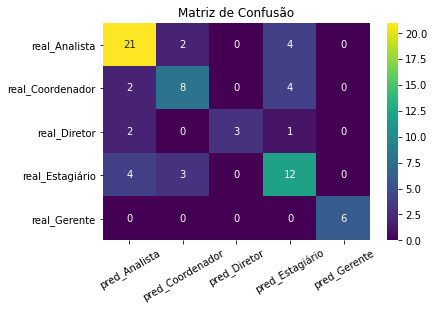

In [93]:
# plot matriz de confusão através da função criada
cm_heatmap(y_test, y_pred)

- FP = Falso positivo (colunas verticais)
- FN = Falso negativo - (colunas horizontais)
- VP = Verdadeiro Positivo - Quadrante quando o real e o predito tem a mesma classe

Com matriz de confusão consegue-se ter uma visão melhor das classificações realizadas pelo modelo.
 - Os Analistas estão sendo confudidos principalmente com Estagiários e também com Coordenadores;
 - Similar aos Analistas, os Coordenadores estão sendo confundidos principalmente com os Estagiários e também com os Analistas.
 - Por sua vez, os Estagiários são confudidos com os Analistas e Coordenadores;
 - Alguns dos diretores estão sendo classificados como Analista e também com os Estagiários
 - Os gerentes não são confudidos com nenhuma outra classe e também nenhuma outra classe é confundida como gerente;  
 - A precisão dos analistas é um pouco comprometida através do número de Falsos Positivos;
 - Os coordenadores apresentam um número de altos de Falsos positivos comparado com seus Verdadeiros Positovos, o que justifica sua precisão mais baixa.
 - Além de um bom pedaço do dados que pertencem a classe de estagiário estarem sendo confundidos outras classes, possui um grande número de Falsos Positivos, o que compromete bastante sua precisão.

#### Validação do modelo por Validação Cruzada (cross_val_score):
Para validar se o modelo não está sofrendo de overfitting (sobreposição), ou seja, os dados de treinamento estão vazando dentro do modelo. Uma das causas disso, é a idealização do modelo causada pelos hiperparâmetros utilizados para o treinamento. Com intenção de verificar se isso não está acontecendo, a validação cruzada faz "k" divisões nos dados onde será treinado "k" vezes com diferentes arranjos de dados para verificar o comportamento e métricas do modelo em diferentes possibilidades e assim, estimando a confiabilidade do modelo.

In [94]:
# número de dobras
dobras = KFold(n_splits=4, random_state=42, shuffle=True)

# validação cruzada para acurácia
crossval_ac = cross_val_score(rfc, X, y, cv=dobras, scoring='accuracy')

# validação cruzada para f1_score
crossval_f1 = cross_val_score(rfc, X, y, cv=dobras, scoring='f1_macro')

print(f'Acurácia CV:  {crossval_ac.mean():.2%} | Desvio Padrão: {crossval_ac.std():.2%}\nF1 Macro CV:  {crossval_f1.mean():.2%} | Desvio Padrão: {crossval_f1.std():.2%}')

Acurácia CV:  73.84% | Desvio Padrão: 3.67%
F1 Macro CV:  61.37% | Desvio Padrão: 5.49%


Por fim, a acurácia geral e o F1_Score do modelo validada através da k-validação cruzada apresentaram bons resultados e estão dentro da faixa das calculada pela função classification_report no treinamento e teste do modelo. Além do mais, os desvios para ambas as métricas é relativamente pequenho, mas pode apresentar uma considerável oscilação na predição de novas classes de dados.

De um modo geral, o modelo consegue classificar corretamente os Cargos de cada funcionário de acordo com os dados de serviços, vendas e dados dos próprios funcionário.